Customer retention is critical to business strategy in the telecommunications industry as companies strive to maintain a stable and loyal customer base. Customer churn, the process by which customers stop using a company's services and switch to a competitor, poses a significant threat to profitability and market share.

**I: Business Understanding**

BO1 :Identify customers likely to leave the company to minimize revenue losses.

BO2: Improve customer loyalty by finding the reason behind customer churn.

BO3: Understanding the reasons for customer dissatisfaction.

DSO:Predict customer churn in the telecommunications sector.

**II: Data Understanding**

In [ ]:
#Import libs
import pandas as pd
import numpy as np
import joblib
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import Dataset
data_80 = pd.read_csv("churn-bigml-80.csv")
data_20 = pd.read_csv("churn-bigml-20.csv")
data_80

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [ ]:
#dataset dimension
print("data_80:")
print(data_80.shape)
print("data_20:")
print(data_20.shape)

data_80:
(2666, 20)
data_20:
(667, 20)


In [ ]:
data_80.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
data_80.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
2665,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
data_80.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
data_80.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000




- State - The US state where the customer is located (e.g., KS, OH, NJ)
- Account length - Number of days the customer has been with the service provider
- Area code - The customer's telephone area code (e.g., 415, 408)
- International plan - Whether the customer has subscribed to an international calling plan (Yes/No)
- Voice mail plan - Whether the customer has a voicemail service plan (Yes/No)
- Number vmail messages - Number of voicemail messages the customer has
- Total day minutes - Total number of minutes the customer used during daytime
- Total day calls - Total number of calls made during daytime
- Total day charge - Amount charged for daytime calls
- Total eve minutes - Total number of minutes used during evening time
- Total eve calls - Total number of calls made during evening time
- Total eve charge - Amount charged for evening calls
- Total night minutes - Total number of minutes used during nighttime
- Total night calls - Total number of calls made during nighttime
 -Total night charge - Amount charged for nighttime calls
- Total intl minutes - Total number of international minutes used
- Total intl calls - Total number of international calls made
- Total intl charge - Amount charged for international calls
-Customer service calls - Number of calls made to customer service
-Churn - Whether the customer has left the service provider (True/False). This is typically the target variable in predictive modeling to identify customers likely to leave the service.

In [ ]:
# Types of variables
variable_types = data_80.dtypes
print("\nTypes des variables :")
print(variable_types)


Types des variables :
State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object


- Visualize the distribution of numerical variables.

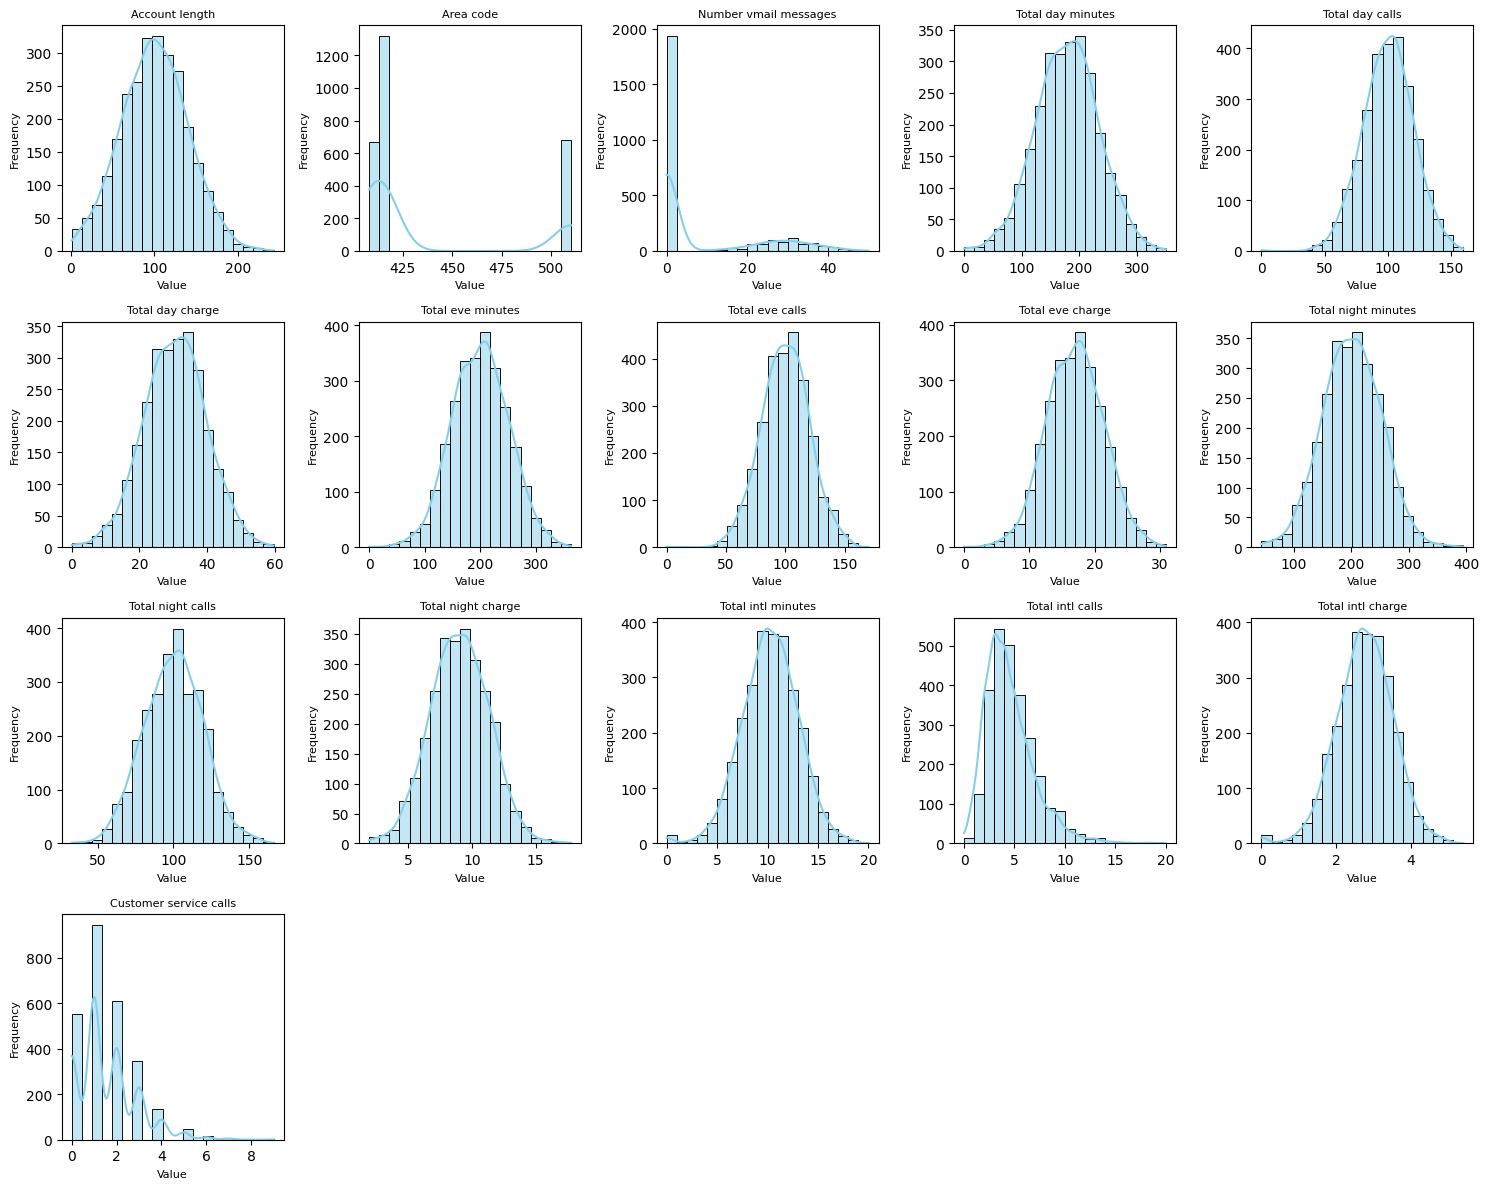

In [ ]:
# Select numerical columns (including binary)
numerical_and_binary_cols = data_80.select_dtypes(include=[np.number]).columns

# Count the number of numerical and binary columns
num_cols = len(numerical_and_binary_cols)

# Determine number of rows and columns for subplots
nrows = (num_cols // 5) + (num_cols % 5 > 0)  # Create enough rows for the number of columns
ncols = 5  # You can adjust this if you want a different number of columns

# Plot histograms for numerical and binary features
plt.figure(figsize=(15, nrows * 3))  # Adjust height based on number of rows
for i, col in enumerate(numerical_and_binary_cols):
    plt.subplot(nrows, ncols, i + 1)  # Dynamic subplot grid
    sns.histplot(data_80[col], bins=20, kde=True, color='skyblue')  # Use a light color for better visibility
    plt.title(col, fontsize=8)  # Smaller title font size
    plt.xlabel('Value', fontsize=8)
    plt.ylabel('Frequency', fontsize=8)

plt.tight_layout()
plt.show()

- Distribution of customers who have churned (True or False).

<ipython-input-14-3fe5c2de64b7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data_80, palette='viridis')


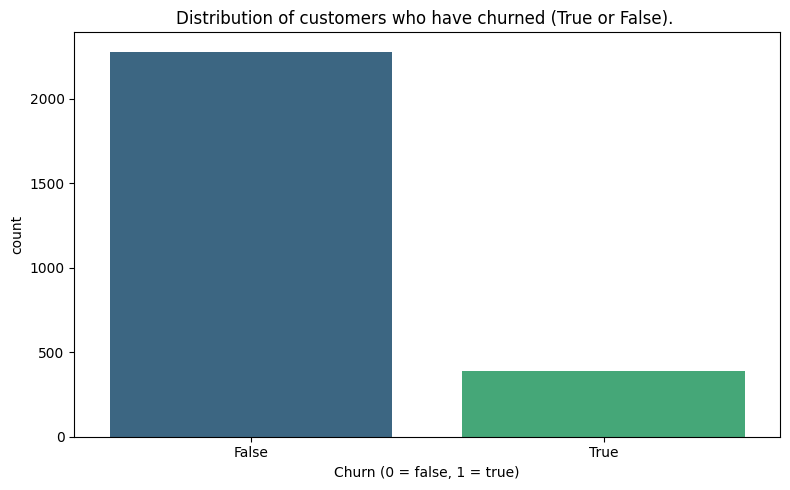

Churn Rate:
Churn
False    0.854464
True     0.145536
Name: proportion, dtype: float64


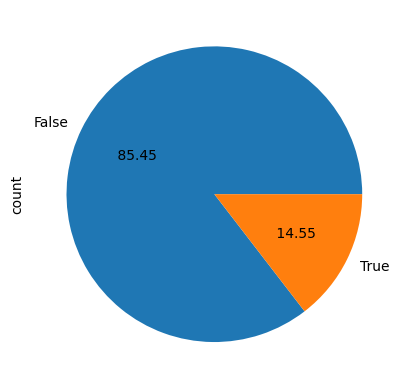

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=data_80, palette='viridis')
plt.title('Distribution of customers who have churned (True or False). ')
plt.xlabel('Churn (0 = false, 1 = true)')
plt.ylabel('count')
plt.tight_layout()
plt.show()
# Churn Distribution
data_80['Churn'].value_counts().plot(kind='pie',autopct='% .2f')
# Print churn rate
print("Churn Rate:")
print(data_80['Churn'].value_counts(normalize=True))

=> We notice an imbalance between the categories of our target variable (FALSE >>> TRUE).

- Visualization of the churn rate across the United States using a map

In [ ]:
# Visualization of the churn rate across the United States using a map
import plotly.express as px

# Calculer les totaux de False et True par État
churn_counts = data_80.groupby(['State', 'Churn']).size().reset_index(name='Count')
churn_totals = churn_counts.pivot(index='State', columns='Churn', values='Count').reset_index()
churn_totals.rename(columns={False: 'Total_False', True: 'Total_True'}, inplace=True)

# Calculer le taux de False
churn_totals['False_Rate'] = churn_totals['Total_False'] / (churn_totals['Total_False'] + churn_totals['Total_True'])

# Créer la carte interactive
fig = px.choropleth(
    churn_totals,
    locations="State",
    locationmode="USA-states",
    color="False_Rate",
    color_continuous_scale="Reds",
    scope="usa",
    hover_data=["Total_False", "Total_True", "False_Rate"],
    title="Carte des États : Taux de False"
)

# Améliorer l'apparence
fig.update_layout(
    geo=dict(showlakes=True, lakecolor="lightblue"),  # Afficher les lacs
    coloraxis_colorbar=dict(
        title="Taux de False",           # Titre de la légende
        tickformat=".0%",               # Format en pourcentage
    ),
    title_font_size=20,
)

# Afficher la carte
fig.show()


**III: Data Preparation**

- we will see if we have missing values

In [ ]:
# Display the missing values for each column
data_80.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [ ]:
# Check how many missing values there are
data_80.isnull().sum().sum()

0

- we will see if we have duplicate rows

In [ ]:
#duplicate rows :
nb_duplicated_rows = data_80.duplicated().sum()
print("nbr redondantes :")
print(nb_duplicated_rows)

nbr redondantes :
0


- we will concatenate the two datasets in order to encode the 'object' and 'bool' type variables.

In [ ]:
# Concatenate the two datasets
data = pd.concat([data_80, data_20], axis=0).reset_index(drop=True)

# Select categorical variables
categorical_cols = data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Apply Label Encoding to all categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])


# Display results
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,48,114,415,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,0
3329,1,106,408,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,0
3330,46,60,415,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,0
3331,49,159,415,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,0


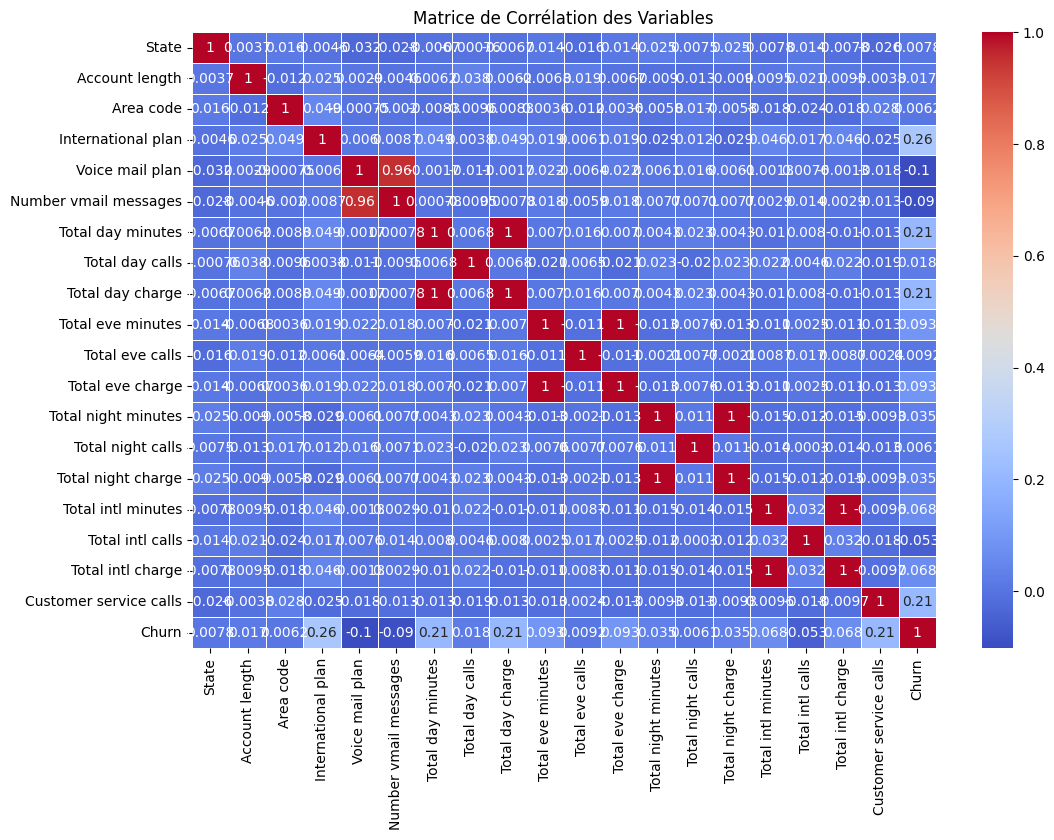

In [ ]:
# calculate the correlation matrix to understand the relationships between the variables
import seaborn as sns
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de Corrélation des Variables')
plt.show()

- visualisation : Box Plots of Numerical Features

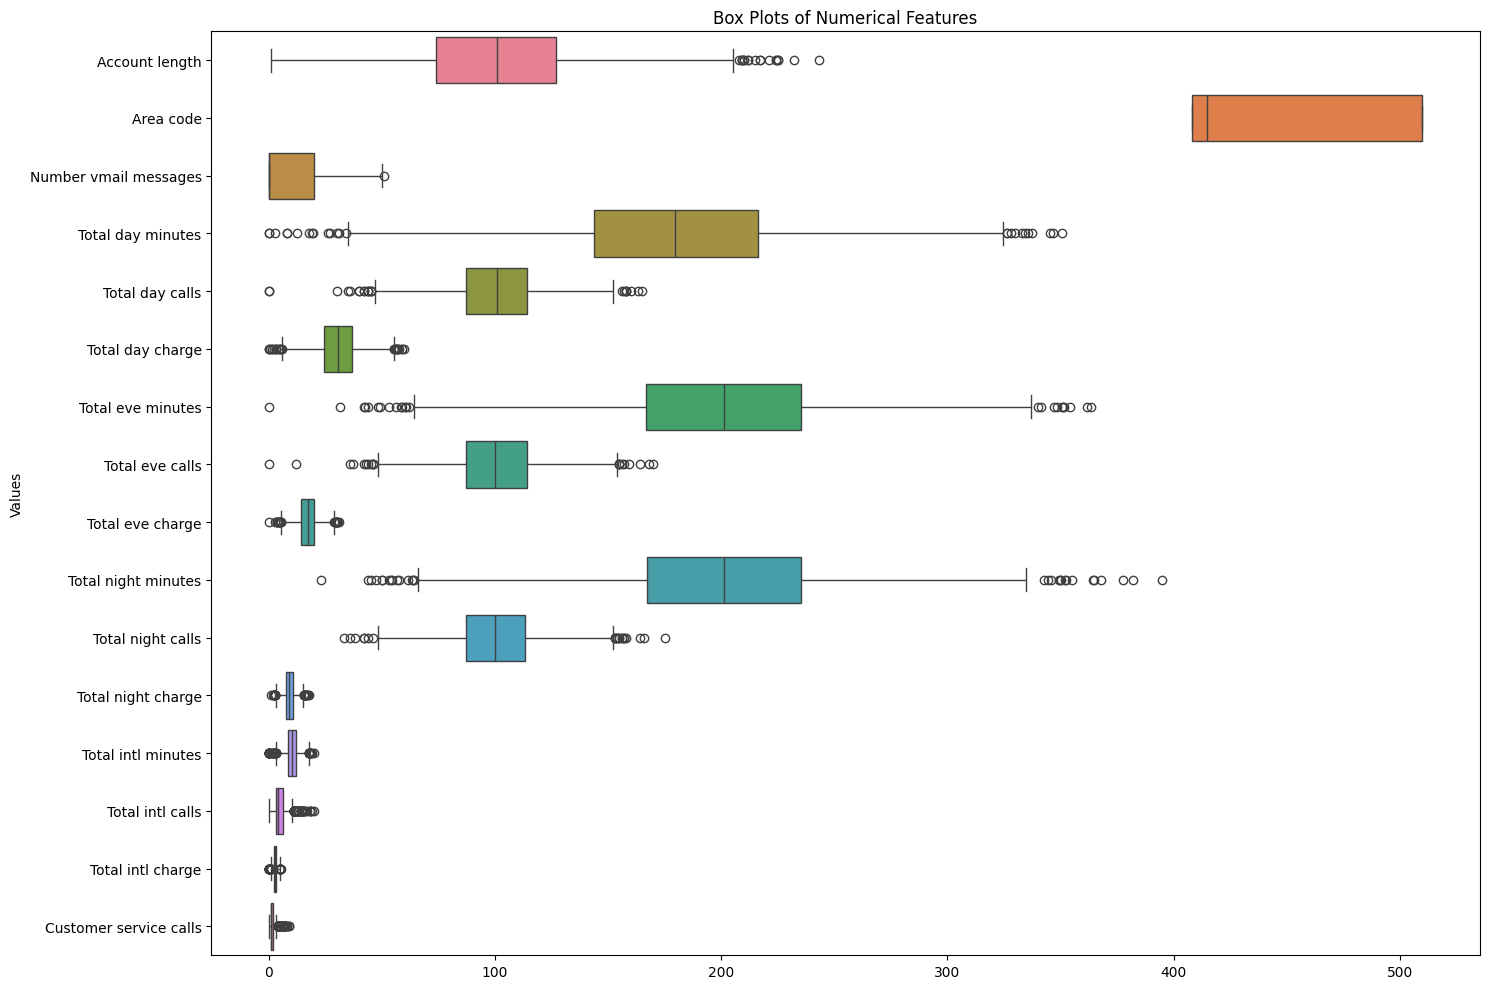

In [ ]:

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Create a figure and axis
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[[col for col in numeric_cols if col not in ['Churn', 'State','International plan', 'Voice mail plan']]], orient='h')

plt.ylabel('Values')
plt.title('Box Plots of Numerical Features')
plt.tight_layout()
plt.show()

Some outliers show natural variations in the population and should be kept in your dataset. These are called true outliers. so we decided that we will not treat those outliers.

- Feature engineering

In [ ]:
import pandas as pd

def add_minutes_per_call_features(dataset):
  for col in ["Total day minutes", "Total day calls", "Total eve minutes",
              "Total eve calls", "Total night minutes", "Total night calls",
              "Total intl minutes", "Total intl calls"]:
      dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

  dataset["Day minutes per call"] = dataset["Total day minutes"] / dataset["Total day calls"]
  dataset["Eve minutes per call"] = dataset["Total eve minutes"] / dataset["Total eve calls"]
  dataset["Night minutes per call"] = dataset["Total night minutes"] / dataset["Total night calls"]
  dataset["Intl minutes per call"] = dataset["Total intl minutes"] / dataset["Total intl calls"]

  return dataset

# Apply the function to all your datasets
data = add_minutes_per_call_features(data)

data.isnull().sum().sum()
data = data.dropna()


- we deleted those column because they contain information already represented in new columns.


In [ ]:
#Delete those column because they contain information already represented in new columns
data = data.drop(columns=[
    "Total day minutes",
    "Total day calls",
    "Total eve minutes",
    "Total eve calls",
    "Total night minutes",
    "Total night calls",
    "Total intl minutes",
    "Total intl calls"
], errors='ignore')


The columns related to "Voice mail plan" contain information that is already represented in the column "Number vmail messages". Specifically, when the "Voice mail plan" is equal to 1, there is a corresponding value in the "Number vmail messages" column, indicating the number of voicemail messages. On the other hand, if the "Voice mail plan" is 0, the value in "Number vmail messages" is 0. This creates redundancy in the dataset, as the information about voicemail usage is already captured by the "Number vmail messages" column, making the other related columns unnecessary for analysis.

In [ ]:
data = data.drop(columns="Voice mail plan")

Examining the distribution of area codes across the states reveals no meaningful insights and suggests potential collection or processing errors. The lack of significant value or information compels us to remove this feature to prevent unnecessary noise in future machine learning processes.

In [ ]:
data = data.drop(columns="Area code")

In [ ]:
data


,State,Account length,International plan,Number vmail messages,Total day charge,Total eve charge,Total night charge,Total intl charge,Customer service calls,Churn,Day minutes per call,Eve minutes per call,Night minutes per call,Intl minutes per call
0,16,128,0,25,45.07,16.78,11.01,2.70,1,0,2.410000,1.993939,2.689011,3.333333
1,35,107,0,26,27.47,16.62,11.45,3.70,1,0,1.313821,1.898058,2.469903,4.566667
2,31,137,0,0,41.38,10.30,7.32,3.29,0,0,2.135088,1.101818,1.563462,2.440000
3,35,84,1,0,50.90,5.26,8.86,1.78,2,0,4.216901,0.703409,2.212360,0.942857
4,36,75,1,0,28.34,12.61,8.41,2.73,3,0,1.475221,1.215574,1.544628,3.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,48,114,0,26,23.31,13.23,11.14,3.11,2,0,1.557955,1.245600,2.634043,1.642857
3329,1,106,0,29,14.21,17.33,10.33,2.19,1,0,0.638168,1.556489,3.143836,2.700000
3330,46,60,0,0,32.96,7.23,9.45,3.56,3,0,1.643220,0.772727,1.567910,1.650000
3331,49,159,0,0,28.87,16.80,8.72,3.13,1,0,1.489474,1.882857,2.362195,2.900000


- standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
scaler = StandardScaler()
X= data.drop('Churn',axis=1)
Y= data['Churn']
X_train,X_test,Y_train,Y_test =  train_test_split(X,Y, train_size=0.8, random_state=42)
X_train = scaler.fit_transform(X_train)
# Transform the test data based on the training data's statistics (no fitting on test data)
X_test = scaler.transform(X_test)



**IV: Modeling**

1/unsupervised



In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
smote = SMOTE(random_state=42)
smoteen = SMOTEENN(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X, Y)
x_reseampled, y_reseampled = smoteen.fit_resample(X, Y)


Difference between SMOTE and SMOTEENN

<ipython-input-29-dba7f89cc844>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




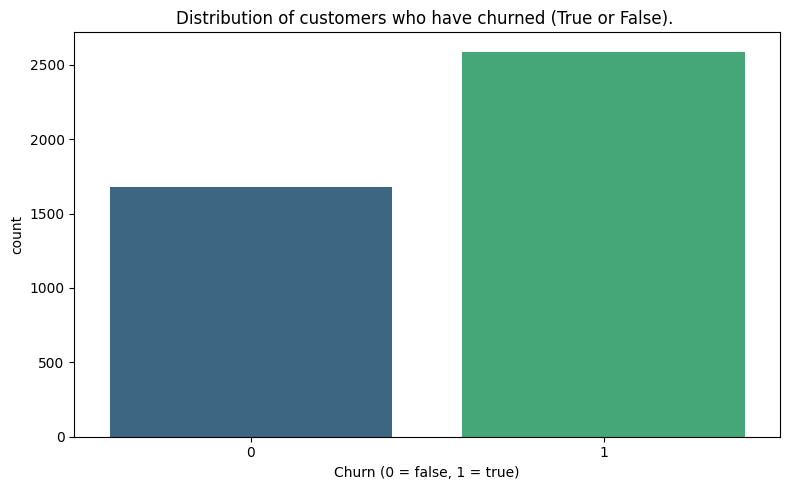

In [ ]:
data_resampled = pd.concat([x_reseampled, y_reseampled], axis=1)

plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=data_resampled, palette='viridis')
plt.title('Distribution of customers who have churned (True or False). ')
plt.xlabel('Churn (0 = false, 1 = true)')
plt.ylabel('count')
plt.tight_layout()
plt.show()

<ipython-input-30-918e1d1dfd7a>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




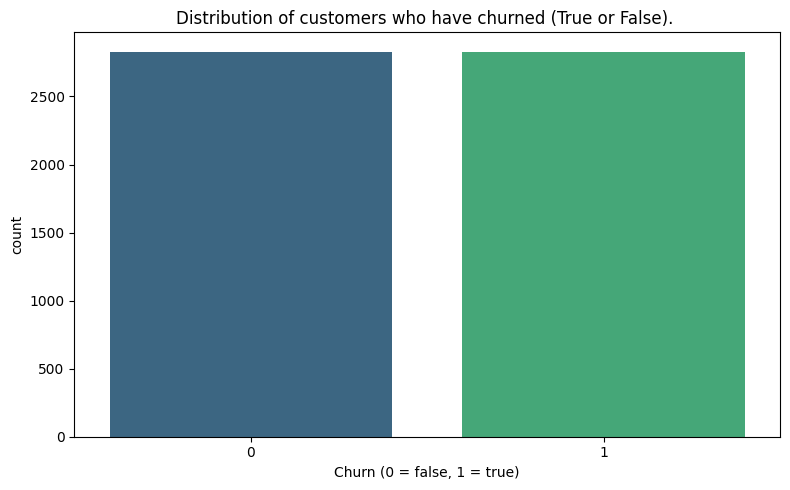

In [ ]:
data_smote = pd.concat([X_train_smote, y_train_smote], axis=1)

plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=data_smote, palette='viridis')
plt.title('Distribution of customers who have churned (True or False). ')
plt.xlabel('Churn (0 = false, 1 = true)')
plt.ylabel('count')
plt.tight_layout()
plt.show()

- SMOTE (Synthetic Minority Oversampling Technique) generates synthetic samples for the minority class (Churn = 0 in this case) to balance the dataset.

- SMOTEENN (SMOTE + Edited Nearest Neighbors) combines oversampling (SMOTE) and undersampling (ENN)

##PCA

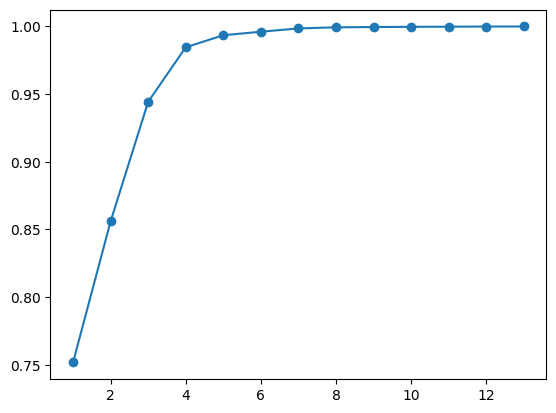

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
wss = []
pca_data = data[data['Churn'] == 1]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(pca_data)
explained_variance_ratio = []
for i in range(1,len(data.columns)):
    pca = PCA(n_components=i)
    pca.fit(data)
    explained_variance_ratio.append(np.sum(pca.explained_variance_ratio_))


plt.plot(range(1,14),explained_variance_ratio,marker='o')

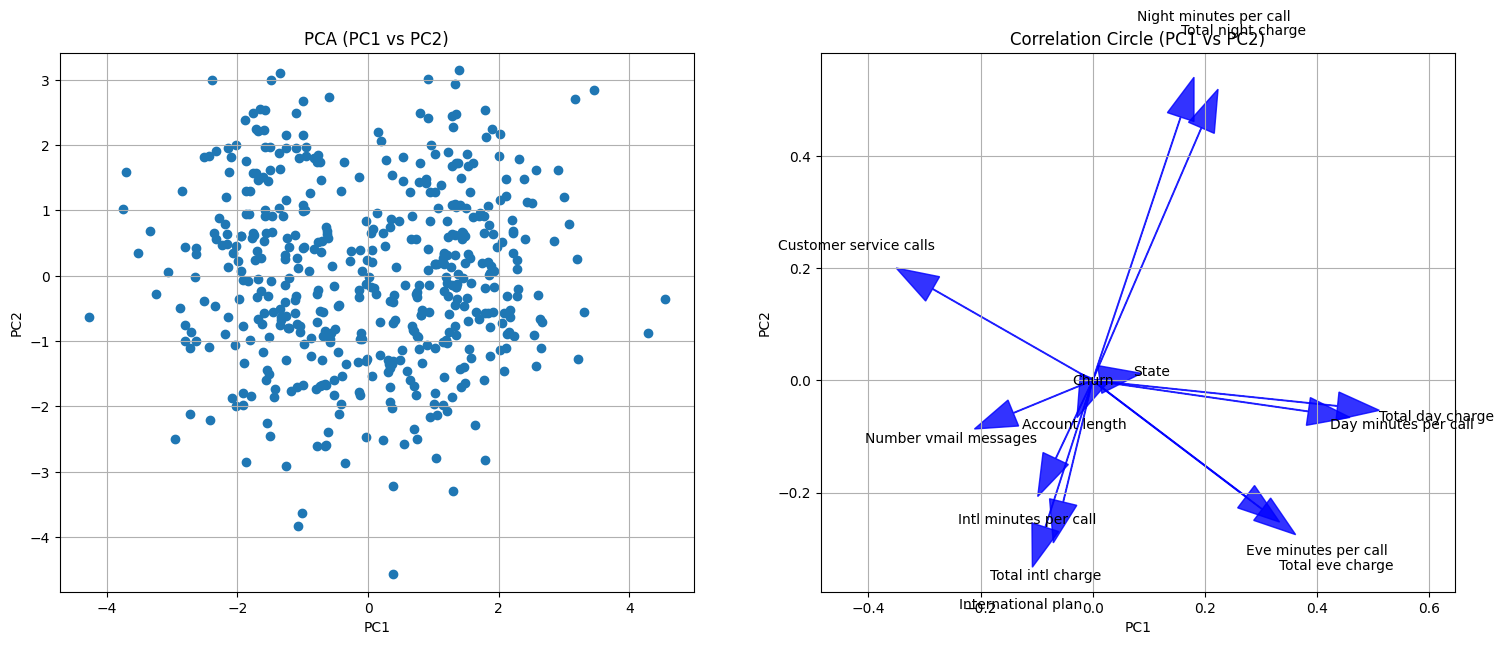

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pcs = pca.components_

############################################### PC1 vs PC2 #######################################
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Scatter plot for PC1 vs PC2
scatter = axes[0].scatter(pca_df['PC1'], pca_df['PC2']) # No need for legend elements here
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].set_title("PCA (PC1 vs PC2)") # Removed KMeans Clustering from title as there is no clustering involved
axes[0].grid(True)
axes[0].set_aspect('equal', adjustable='datalim')

# Correlation circle for PC1 vs PC2
for i, feature in enumerate(pca_data.columns): # Assuming pca_data has columns
    axes[1].arrow(0, 0, pcs[0, i], pcs[1, i], color='blue', alpha=0.8, head_width=0.05, length_includes_head=True)
    axes[1].text(pcs[0, i] * 1.2, pcs[1, i] * 1.2, feature, color='black', fontsize=10, ha='center', va='center')
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].set_title("Correlation Circle (PC1 vs PC2)") # More appropriate title
axes[1].grid(True)
axes[1].set_aspect('equal', adjustable='datalim')


plt.show()

## K_Means

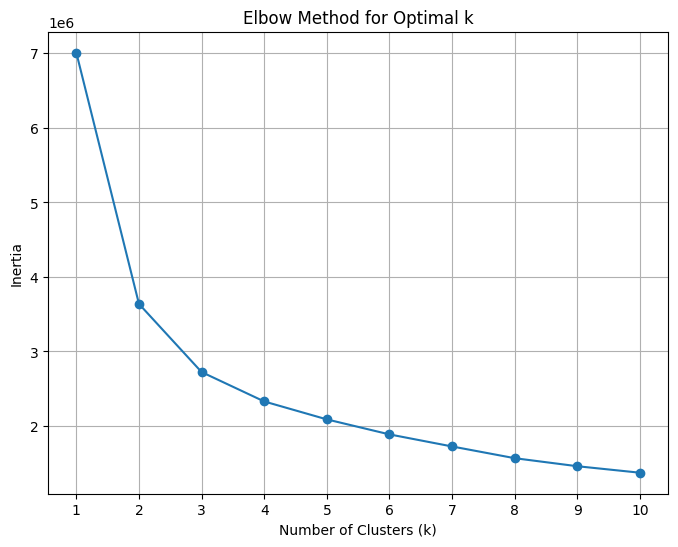

In [ ]:
from sklearn.cluster import KMeans

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

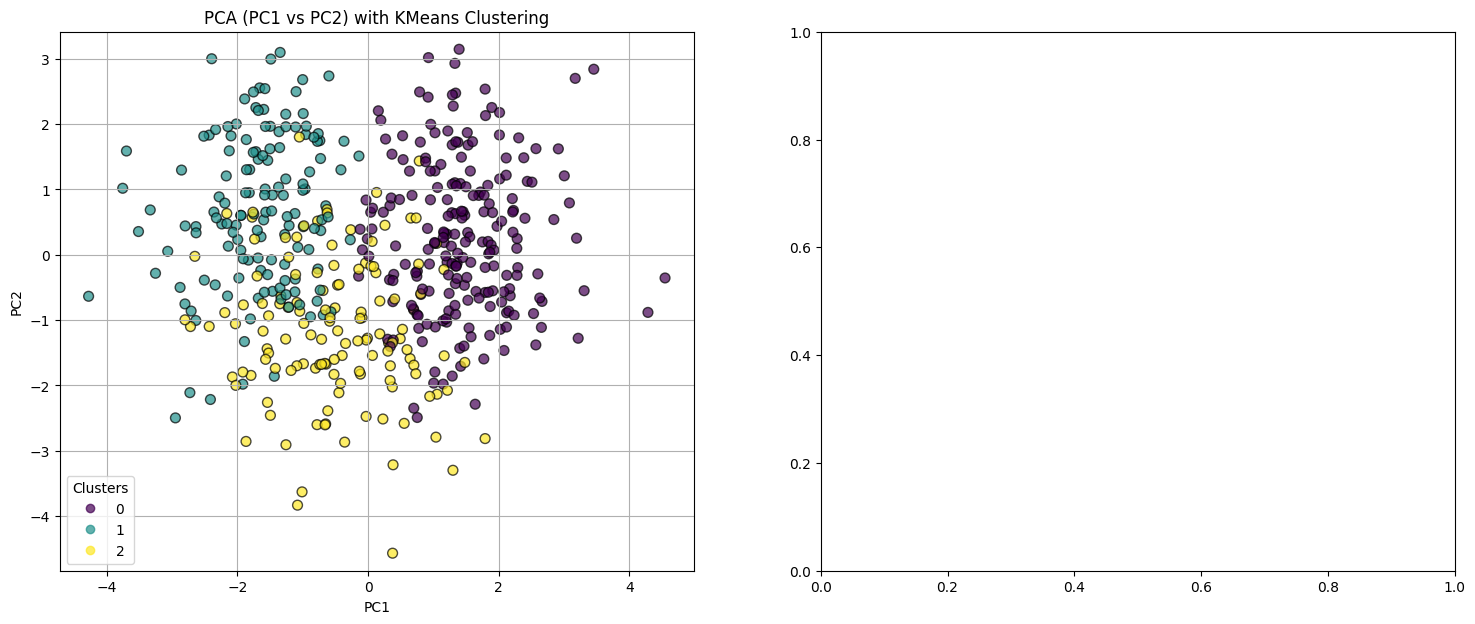

In [ ]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pcs = pca.components_

from sklearn.cluster import KMeans

# Fit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = kmeans_labels

# Define colors for clusters
cluster_colors = ['red', 'green', 'blue']
labels = kmeans.labels_

############################################### PC1 vs PC2 #######################################
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Scatter plot for PC1 vs PC2
scatter = axes[0].scatter(
    pca_df['PC1'], pca_df['PC2'],
    c=pca_df['Cluster'], cmap='viridis', s=50, alpha=0.7, edgecolor='k'
)
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].set_title("PCA (PC1 vs PC2) with KMeans Clustering")
axes[0].legend(*scatter.legend_elements(), loc="lower left", title="Clusters")
axes[0].grid(True)
axes[0].set_aspect('equal', adjustable='datalim')


Based on the K_means: the  features (Customer service call ,  international plan /total int charge ,total day charge)

#####**supervised**

## **1/ model without balancing**

###**SVC**

In [ ]:
# Initialize models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import label_binarize

**GRID search for SVC with parameters**

In [ ]:
svc = SVC()


param_grid = {
    'C': np.logspace(np.log10(0.001641949), np.log10(464.0812108), 20)
}

grid_search = GridSearchCV(estimator=svc,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)

grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score", grid_search.best_score_)
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'C': 2.3514590980508254}
Best Cross-Validation Score 0.9275198187995469


In [ ]:
models_svc = {
    'SVC_grid': SVC(C=2.3514590980508254,random_state=42, kernel='poly'),
    'SVC': SVC(random_state=42, kernel='poly')
}
# Train and evaluate each model
for name, model in models_svc.items():
    print(f"\n{name}:")

    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(Y_test, y_pred))


SVC_grid:
Accuracy: 0.9186

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       569
           1       0.86      0.51      0.64        94

    accuracy                           0.92       663
   macro avg       0.89      0.75      0.80       663
weighted avg       0.91      0.92      0.91       663


SVC:
Accuracy: 0.9140

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       569
           1       0.88      0.46      0.60        94

    accuracy                           0.91       663
   macro avg       0.90      0.72      0.78       663
weighted avg       0.91      0.91      0.90       663



**Evaluation SVC**

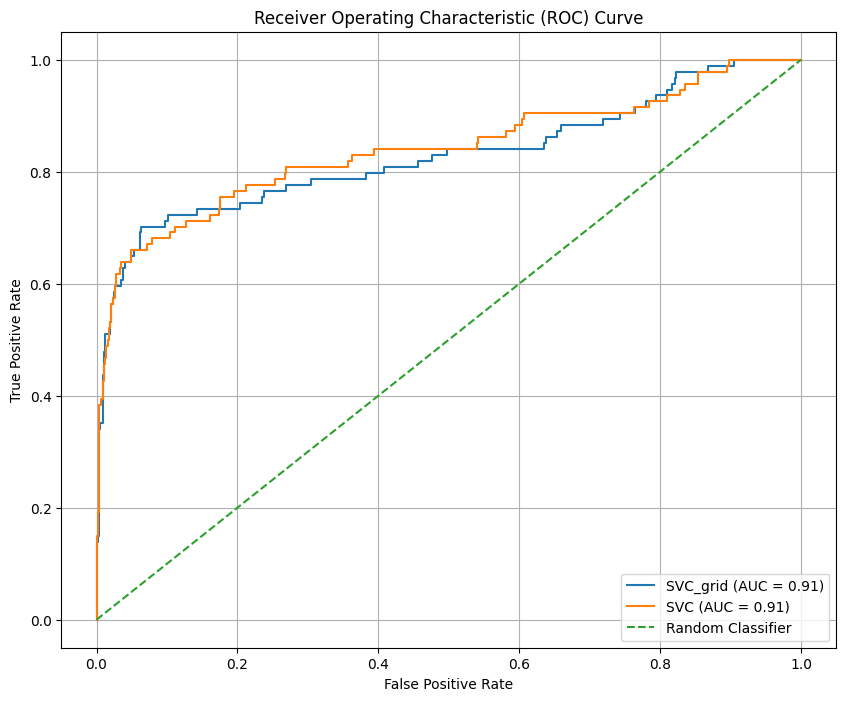

In [ ]:
plt.figure(figsize=(10, 8))
for name, model in models_svc.items():
  # Binarize the labels for multi-class classification
    y_test_bin = label_binarize(Y_test, classes=model.classes_)

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test_bin, model.decision_function(X_test).ravel())
    auc_score = roc_auc_score(y_test_bin, model.decision_function(X_test).ravel())

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {accuracy:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')

# Customize plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

###**Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
param_grid = {
    'max_depth' :[9,11,13,15],
    'n_estimators': [14,16,18]
}

grid_search = GridSearchCV(estimator=random,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)

grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score", grid_search.best_score_)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': 13, 'n_estimators': 16}
Best Cross-Validation Score 0.9377123442808607


**Evaluation Random forest**

In [ ]:
models_random = {
    'Random_grid': RandomForestClassifier(random_state=42, max_depth=13,n_estimators=16),
    'Random Forest': RandomForestClassifier(random_state=42)
}
# Train and evaluate each model
for name, model in models_svc.items():
    print(f"\n{name}:")

    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(Y_test, y_pred))


SVC_grid:
Accuracy: 0.9186

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       569
           1       0.86      0.51      0.64        94

    accuracy                           0.92       663
   macro avg       0.89      0.75      0.80       663
weighted avg       0.91      0.92      0.91       663


SVC:
Accuracy: 0.9140

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       569
           1       0.88      0.46      0.60        94

    accuracy                           0.91       663
   macro avg       0.90      0.72      0.78       663
weighted avg       0.91      0.91      0.90       663



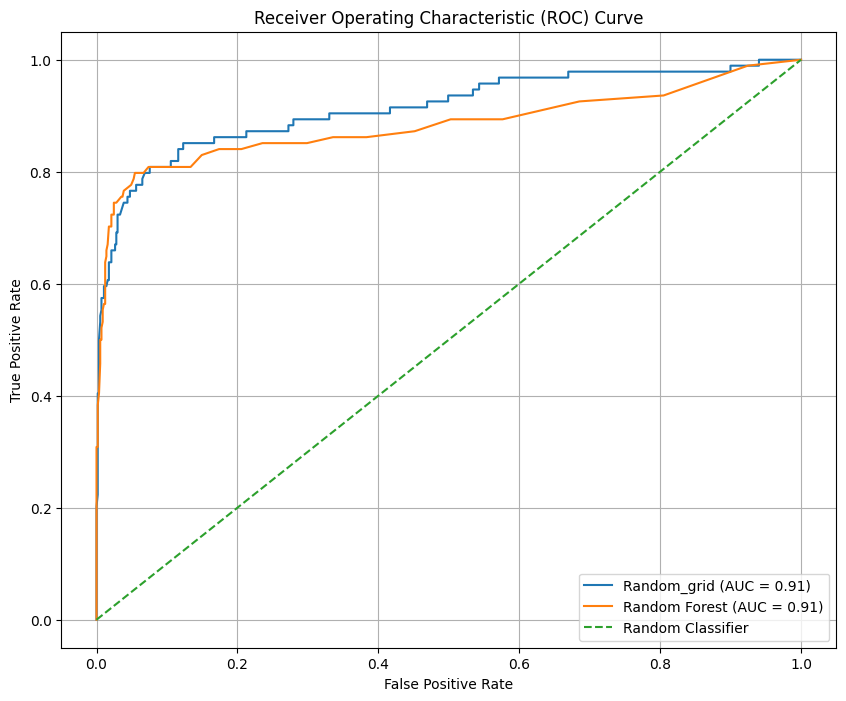

In [ ]:

plt.figure(figsize=(10, 8))

for name, model in models_random.items():
    # Fit the model
    model.fit(X_train, Y_train)

    # Predict probabilitiesx
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
    auc_score = roc_auc_score(Y_test, y_pred_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {accuracy:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')

# Customize plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

###**XGBoost**

In [ ]:
import xgboost as xgb
xgb = XGBClassifier()
param_grid = {
    'learning_rate' : np.linspace(0.01, 0.3, 1),
    'n_estimators': range(100,1001,100),
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=xgb,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)

grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score", grid_search.best_score_)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 900}
Best Cross-Validation Score 0.9509248773121932


**Evalution de XGboost**

In [ ]:
import xgboost as xgb
models_GBM = {
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'XGBoost_grid': xgb.XGBClassifier(random_state=42, learning_rate= 0.01, max_depth =7, n_estimators= 900),
}
# Train and evaluate each model
for name, model in models_GBM.items():
    print(f"\n{name}:")

    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(Y_test, y_pred))


XGBoost:
Accuracy: 0.9487

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       569
           1       0.94      0.68      0.79        94

    accuracy                           0.95       663
   macro avg       0.95      0.84      0.88       663
weighted avg       0.95      0.95      0.95       663


XGBoost_grid:
Accuracy: 0.9442

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       569
           1       0.91      0.67      0.77        94

    accuracy                           0.94       663
   macro avg       0.93      0.83      0.87       663
weighted avg       0.94      0.94      0.94       663



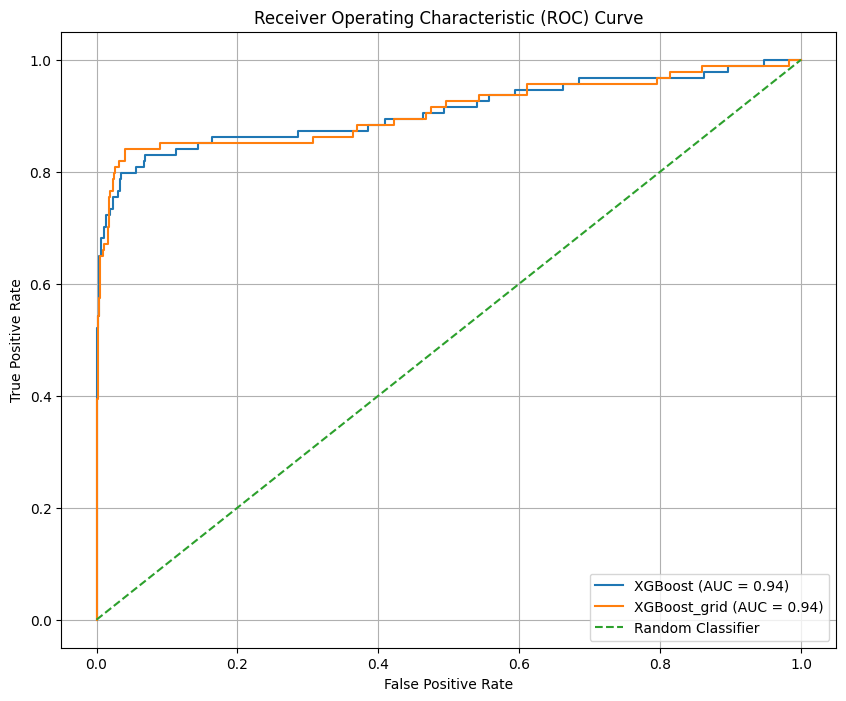

In [ ]:
plt.figure(figsize=(10, 8))

for name, model in models_GBM.items():
    # Fit the model
    model.fit(X_train, Y_train)

    # Predict probabilitiesx
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
    auc_score = roc_auc_score(Y_test, y_pred_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {accuracy:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')

# Customize plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

### **logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
param_grid = {
    'C': np.logspace(-5, 5, 20)
}

grid_search = GridSearchCV(estimator=clf,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)

grid_search.fit(X_train, Y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score", grid_search.best_score_)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'C': 0.5455594781168515}
Best Cross-Validation Score 0.8618346545866364


In [ ]:
models_log = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Logistic_grid': LogisticRegression(random_state=42,C= 0.5455594781168515)}
# Train and evaluate each model
for name, model in models_log.items():
    print(f"\n{name}:")

    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(Y_test, y_pred))


Logistic Regression:
Accuracy: 0.8673

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       569
           1       0.60      0.19      0.29        94

    accuracy                           0.87       663
   macro avg       0.74      0.59      0.61       663
weighted avg       0.84      0.87      0.84       663


Logistic_grid:
Accuracy: 0.8673

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       569
           1       0.60      0.19      0.29        94

    accuracy                           0.87       663
   macro avg       0.74      0.59      0.61       663
weighted avg       0.84      0.87      0.84       663



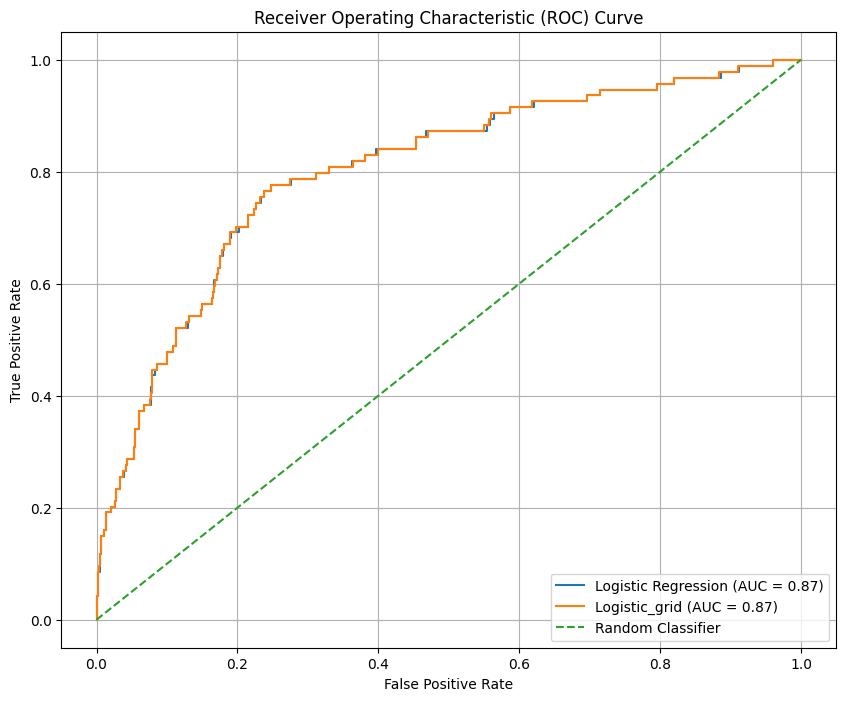

In [ ]:
plt.figure(figsize=(10, 8))

for name, model in models_log.items():
    # Fit the model
    model.fit(X_train, Y_train)

    # Predict probabilitiesx
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
    auc_score = roc_auc_score(Y_test, y_pred_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {accuracy:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')

# Customize plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

###**ADAboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
param_grid = {
    'learning_rate' : np.linspace(0.01, 1.0, 10),
    'n_estimators': range(50,500,20)
}

grid_search = GridSearchCV(estimator=ada,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)

grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score", grid_search.best_score_)
best_model = grid_search.best_estimator_

**Evalution ADAboost**

In [ ]:
models_ada = {
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'AdaBoost_grid': AdaBoostClassifier(random_state=42, learning_rate=1.0,n_estimators=50)}
# Train and evaluate each model
for name, model in models_ada.items():
    print(f"\n{name}:")

    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(Y_test, y_pred))


AdaBoost:


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Accuracy: 0.8899

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       569
           1       0.71      0.38      0.50        94

    accuracy                           0.89       663
   macro avg       0.81      0.68      0.72       663
weighted avg       0.88      0.89      0.88       663


AdaBoost_grid:


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Accuracy: 0.8899

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       569
           1       0.71      0.38      0.50        94

    accuracy                           0.89       663
   macro avg       0.81      0.68      0.72       663
weighted avg       0.88      0.89      0.88       663



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



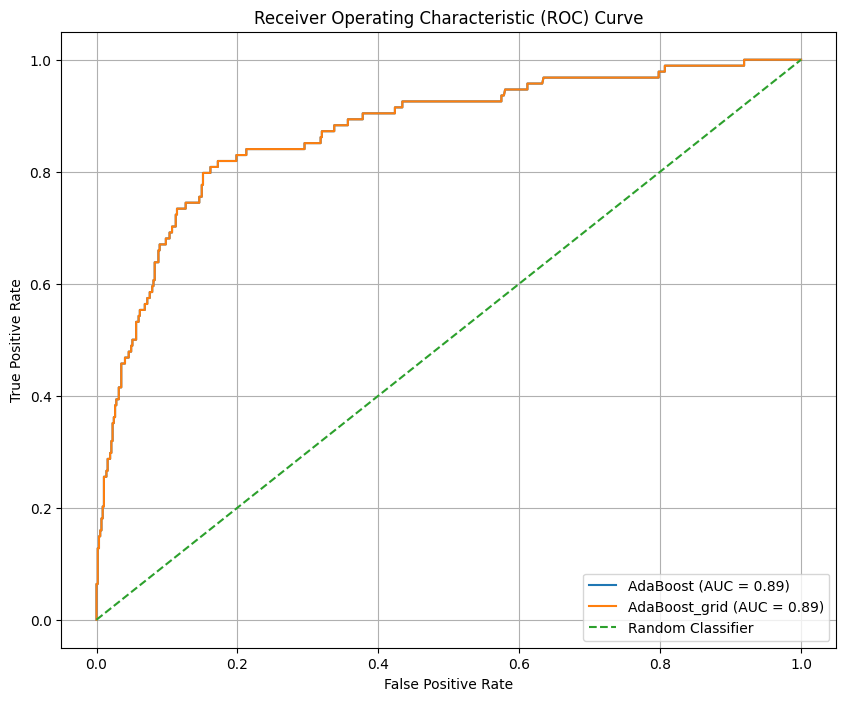

In [ ]:
plt.figure(figsize=(10, 8))

for name, model in models_ada.items():
    # Fit the model
    model.fit(X_train, Y_train)

    # Predict probabilitiesx
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
    auc_score = roc_auc_score(Y_test, y_pred_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {accuracy:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')

# Customize plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

**GBM**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Définir les valeurs possibles pour max_depth entre 5 et 29 (espacées)
param_grid = {
        'max_leaf_nodes': range(3, 8),
    'min_samples_leaf': range(5, 11),
    'max_depth': [5, 9, 13, 17, 29]

}

# Initialisation du modèle GradientBoostingClassifier
gbm = GradientBoostingClassifier()

# GridSearchCV avec GradientBoostingClassifier et le param_grid
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
best_model = grid_search.best_estimator_

###**GBM**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
models_gbm2 = {
    'GBM': GradientBoostingClassifier(random_state=42),
    'GBM_grid': GradientBoostingClassifier(random_state=42,max_depth= 9, max_leaf_nodes= 7, min_samples_leaf= 9)}
# Train and evaluate each model
for name, model in models_gbm2.items():
    print(f"\n{name}:")

    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(Y_test, y_pred))


GBM:
Accuracy: 0.9306

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       569
           1       0.84      0.63      0.72        94

    accuracy                           0.93       663
   macro avg       0.89      0.80      0.84       663
weighted avg       0.93      0.93      0.93       663


GBM_grid:
Accuracy: 0.9457

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       569
           1       0.91      0.68      0.78        94

    accuracy                           0.95       663
   macro avg       0.93      0.84      0.87       663
weighted avg       0.94      0.95      0.94       663



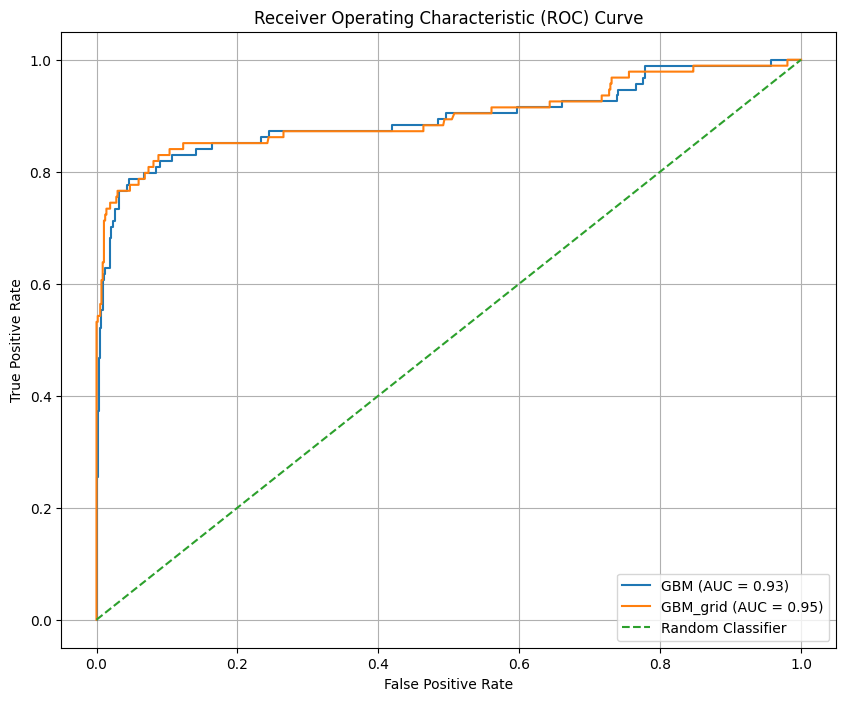

In [ ]:
plt.figure(figsize=(10, 8))

for name, model in models_gbm2.items():
    # Fit the model
    model.fit(X_train, Y_train)
        # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)

    # Predict probabilitiesx
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
    auc_score = roc_auc_score(Y_test, y_pred_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {accuracy:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')

# Customize plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

### **decision tree**

In [ ]:
models_add = {
    'Decision Tree': DecisionTreeClassifier(random_state=42)}
# Train and evaluate each model
for name, model in models_add.items():
    print(f"\n{name}:")

    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(Y_test, y_pred))


Decision Tree:
Accuracy: 0.9005

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       569
           1       0.65      0.64      0.65        94

    accuracy                           0.90       663
   macro avg       0.80      0.79      0.79       663
weighted avg       0.90      0.90      0.90       663



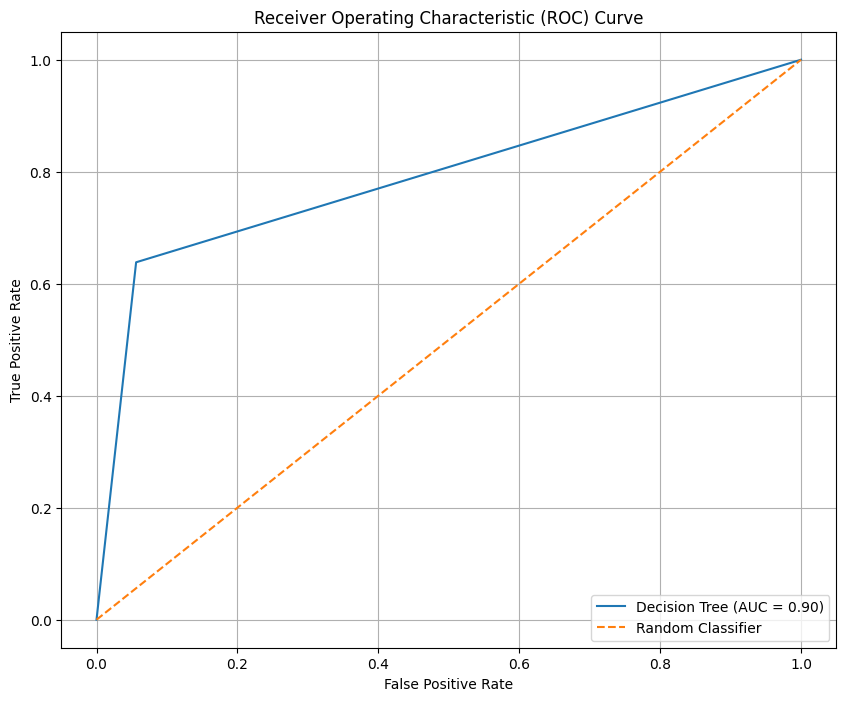

In [ ]:
plt.figure(figsize=(10, 8))

for name, model in models_add.items():
    # Fit the model
    model.fit(X_train, Y_train)

    # Predict probabilitiesx
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
    auc_score = roc_auc_score(Y_test, y_pred_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {accuracy:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')

# Customize plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

### **KNN**

In [ ]:
models_knn = {
    'KNN': KNeighborsClassifier(),}
# Train and evaluate each model
for name, model in models_knn.items():
    print(f"\n{name}:")

    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(Y_test, y_pred))


KNN:
Accuracy: 0.8869

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       569
           1       0.74      0.31      0.44        94

    accuracy                           0.89       663
   macro avg       0.82      0.65      0.69       663
weighted avg       0.87      0.89      0.87       663



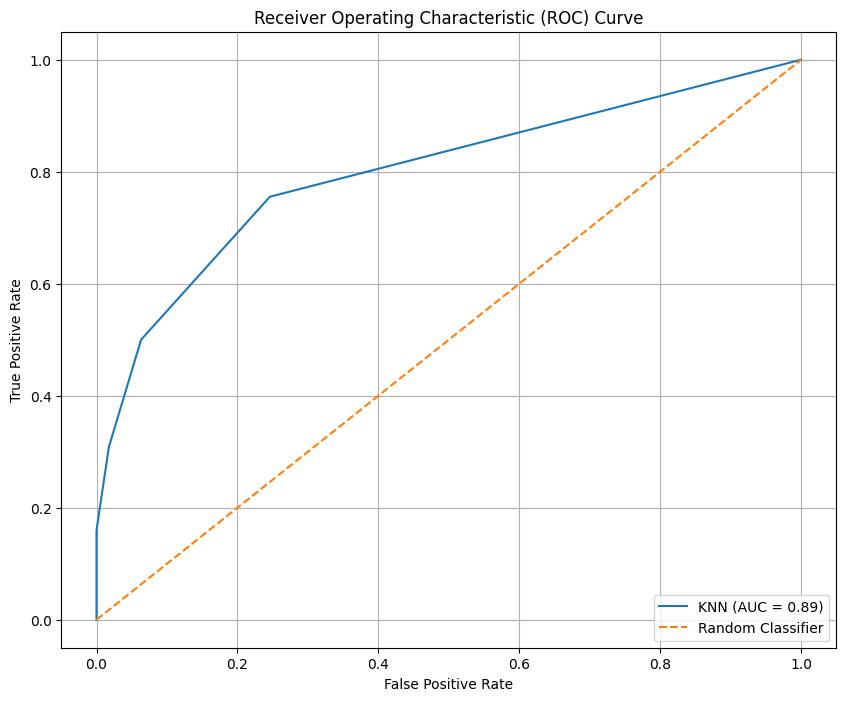

In [ ]:
plt.figure(figsize=(10, 8))

for name, model in models_knn.items():
    # Fit the model
    model.fit(X_train, Y_train)

    # Predict probabilitiesx
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
    auc_score = roc_auc_score(Y_test, y_pred_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {accuracy:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')

# Customize plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

**AFter revivion all the ROc will will chosse which of each defaut and with grid search is the better**

In [ ]:
models_final = {
    'KNN': KNeighborsClassifier(),
    'Random_grid': RandomForestClassifier(random_state=42, max_depth=13,n_estimators=16),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'Logistic_grid': LogisticRegression(random_state=42,C= 0.5455594781168515) ,
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'GBM_grid': GradientBoostingClassifier(random_state=42,max_depth= 9, max_leaf_nodes= 7, min_samples_leaf= 9),
    'AdaBoost_grid': AdaBoostClassifier(random_state=42, learning_rate=1.0,n_estimators=50)
}
# Train and evaluate each model
for name, model in models_final.items():
    print(f"\n{name}:")

    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(Y_test, y_pred))


KNN:
Accuracy: 0.8869

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       569
           1       0.74      0.31      0.44        94

    accuracy                           0.89       663
   macro avg       0.82      0.65      0.69       663
weighted avg       0.87      0.89      0.87       663


Random_grid:
Accuracy: 0.9306

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       569
           1       0.93      0.55      0.69        94

    accuracy                           0.93       663
   macro avg       0.93      0.77      0.83       663
weighted avg       0.93      0.93      0.92       663


XGBoost:
Accuracy: 0.9487

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       569
           1       0.94      0.68      0.79        94

    accuracy                 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Accuracy: 0.8899

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       569
           1       0.71      0.38      0.50        94

    accuracy                           0.89       663
   macro avg       0.81      0.68      0.72       663
weighted avg       0.88      0.89      0.88       663



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



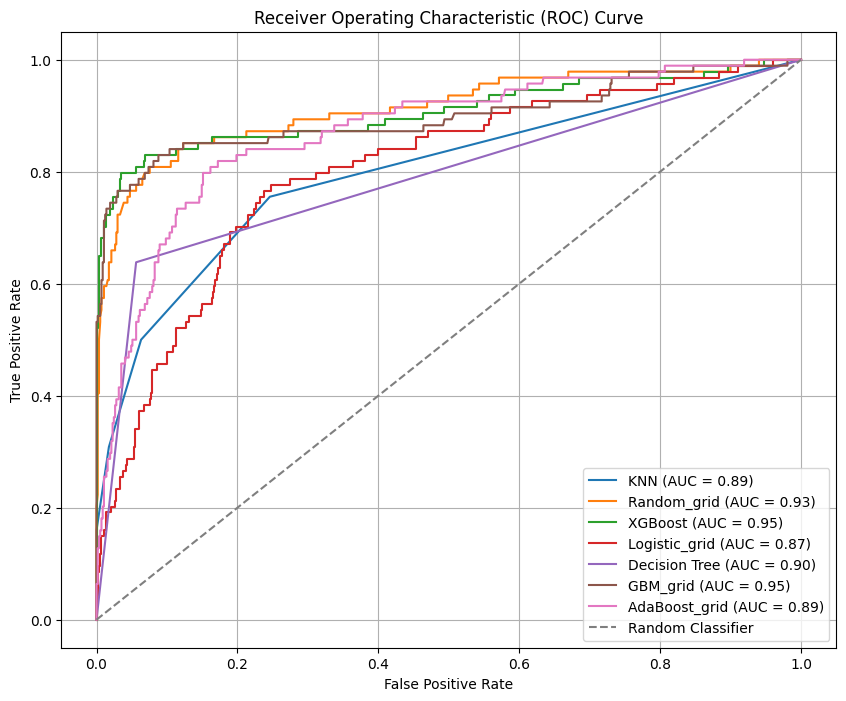

In [ ]:
plt.figure(figsize=(10, 8))

for name, model in models_final.items():
    # Fit the model
    model.fit(X_train, Y_train)
        # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)

    # Predict probabilitiesx
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
    auc_score = roc_auc_score(Y_test, y_pred_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {accuracy:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')

# Customize plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

the results  of every ROC/AUCshows that the best model is the XGBOOST and GBM_grid( which we used gridsearch to find the best hyperparameters)

## **2/Model with Balancing**

In [ ]:
data1 = data.copy()

In [ ]:
scaler = StandardScaler()
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
smote = SMOTEENN(random_state=42)

X = data1.drop('Churn',axis=1)
Y= data1['Churn']
X_smote,Y_smote = smote.fit_resample(X,Y)
X_train1,X_test1,Y_train1,Y_test1 =  train_test_split(X_smote,Y_smote, train_size=0.8, random_state=42)


X_train1 = pd.DataFrame(scaler.fit_transform(X_train1 ))
X_test1  = pd.DataFrame(scaler.fit_transform(X_test1 ))

### **SVC**

In [ ]:
svc = SVC()
param_grid = {
    'C': np.logspace(np.log10(0.001641949), np.log10(464.0812108), 20)
}

grid_search = GridSearchCV(estimator=svc,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)

grid_search.fit(X_train1, Y_train1)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score", grid_search.best_score_)
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'C': 123.81687718961999}
Best Cross-Validation Score 0.9033962823122063


**Evaluation SVC**

In [ ]:
models_svc_smoteenn = {
    'SVC_grid': SVC(C=123.81687718961999,random_state=42, kernel='poly'),
    'SVC': SVC(random_state=42, kernel='poly')
}
# Train and evaluate each model
for name, model in models_svc_smoteenn.items():
    print(f"\n{name}:")

    # Train the model
    model.fit(X_train1, Y_train1)

    # Make predictions
    y_pred = model.predict(X_test1)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test1, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(Y_test1, y_pred))




SVC_grid:
Accuracy: 0.8316

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       369
           1       0.83      0.88      0.86       486

    accuracy                           0.83       855
   macro avg       0.83      0.82      0.83       855
weighted avg       0.83      0.83      0.83       855


SVC:
Accuracy: 0.8082

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.66      0.75       369
           1       0.78      0.92      0.84       486

    accuracy                           0.81       855
   macro avg       0.82      0.79      0.80       855
weighted avg       0.82      0.81      0.80       855



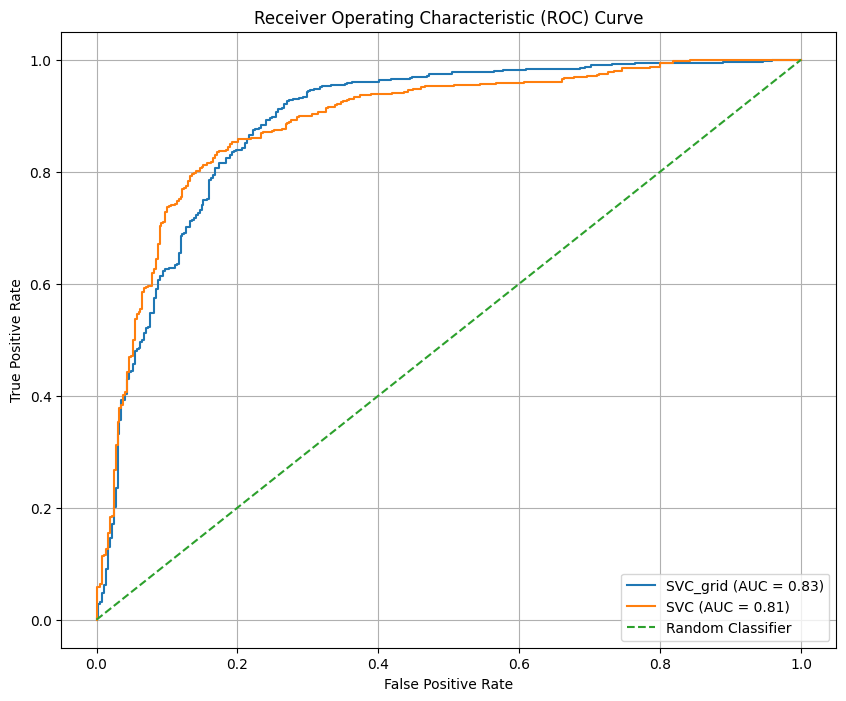

In [ ]:
plt.figure(figsize=(10, 8))
for name, model in models_svc_smoteenn.items():
  # Binarize the labels for multi-class classification
    y_test_bin = label_binarize(Y_test1, classes=model.classes_)
        # Make predictions
    y_pred = model.predict(X_test1)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test1, y_pred)

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test_bin, model.decision_function(X_test1).ravel())
    auc_score = roc_auc_score(y_test_bin, model.decision_function(X_test1).ravel())

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {accuracy:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')

# Customize plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

### **Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
param_grid = {
    'max_depth' :[9,11,13,15],
    'n_estimators': [14,16,18]
}


grid_search = GridSearchCV(estimator=random,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)


grid_search.fit(X_train1, Y_train1)


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score", grid_search.best_score_)
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 15, 'n_estimators': 18}
Best Cross-Validation Score 0.8990026092014857


In [ ]:
models_random_smote = {
    'Random_grid': RandomForestClassifier(random_state=42, max_depth=15,n_estimators=18),
    'Random Forest': RandomForestClassifier(random_state=42)
}
# Train and evaluate each model
for name, model in models_random_smote.items():
    print(f"\n{name}:")


    # Train the model
    model.fit(X_train1, Y_train1)


    # Make predictions
    y_pred = model.predict(X_test1)


    # Calculate accuracy
    accuracy = accuracy_score(Y_test1, y_pred)
    print(f"Accuracy: {accuracy:.4f}")


    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(Y_test1, y_pred))


Random_grid:
Accuracy: 0.9228

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       369
           1       0.94      0.93      0.93       486

    accuracy                           0.92       855
   macro avg       0.92      0.92      0.92       855
weighted avg       0.92      0.92      0.92       855


Random Forest:
Accuracy: 0.9357

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       369
           1       0.95      0.94      0.94       486

    accuracy                           0.94       855
   macro avg       0.93      0.94      0.93       855
weighted avg       0.94      0.94      0.94       855



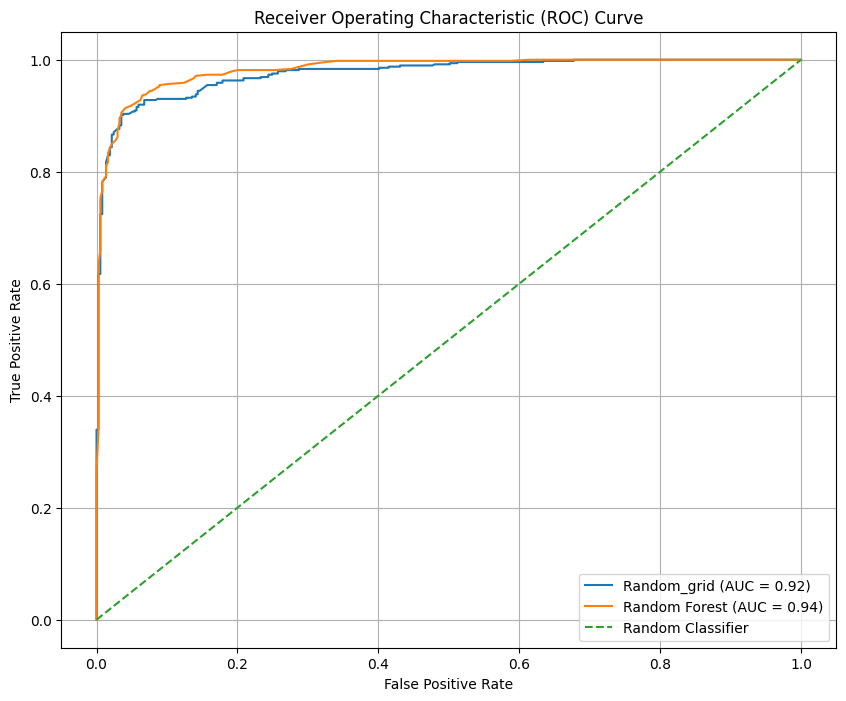

In [ ]:
plt.figure(figsize=(10, 8))


for name, model in models_random_smote.items():
    # Fit the model
    model.fit(X_train1, Y_train1)

    y_pred = model.predict(X_test1)


    # Calculate accuracy
    accuracy = accuracy_score(Y_test1, y_pred)
    # Predict probabilitiesx
    y_pred_proba = model.predict_proba(X_test1)[:, 1]


    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_test1, y_pred_proba)
    auc_score = roc_auc_score(Y_test1, y_pred_proba)


    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {accuracy:.2f})')


# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')


# Customize plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)


plt.show()


### **Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
param_grid = {
    'C': np.logspace(-5, 5, 20)
}


grid_search = GridSearchCV(estimator=clf,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)


grid_search.fit(X_train1, Y_train1)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score", grid_search.best_score_)
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'C': 1.8329807108324339}
Best Cross-Validation Score 0.722479816363237


In [ ]:
models_log_smote = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Logistic_grid': LogisticRegression(random_state=42,C= 1.8329807108324339)}
# Train and evaluate each model
for name, model in models_log_smote.items():
    print(f"\n{name}:")


    # Train the model
    model.fit(X_train1, Y_train1)


    # Make predictions
    y_pred = model.predict(X_test1)


    # Calculate accuracy
    accuracy = accuracy_score(Y_test1, y_pred)
    print(f"Accuracy: {accuracy:.4f}")


    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(Y_test1, y_pred))


Logistic Regression:
Accuracy: 0.6842

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.49      0.57       369
           1       0.68      0.83      0.75       486

    accuracy                           0.68       855
   macro avg       0.69      0.66      0.66       855
weighted avg       0.68      0.68      0.67       855


Logistic_grid:
Accuracy: 0.6842

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.49      0.57       369
           1       0.68      0.83      0.75       486

    accuracy                           0.68       855
   macro avg       0.69      0.66      0.66       855
weighted avg       0.68      0.68      0.67       855



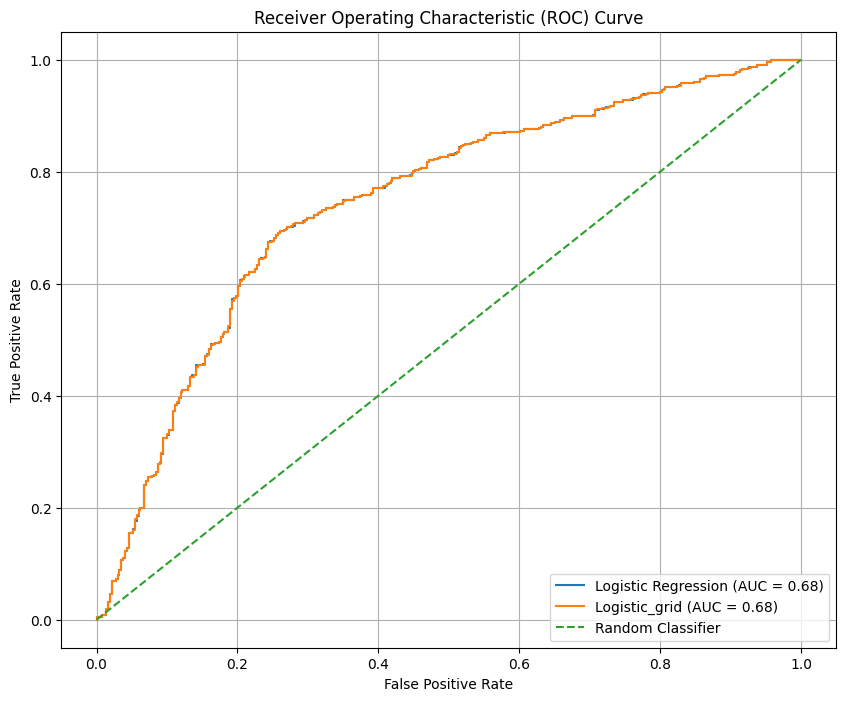

In [ ]:
plt.figure(figsize=(10, 8))


for name, model in models_log_smote.items():
    # Fit the model
    model.fit(X_train1, Y_train1)


    # Predict probabilitiesx
    y_pred_proba = model.predict_proba(X_test1)[:, 1]


    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_test1, y_pred_proba)
    auc_score = roc_auc_score(Y_test1, y_pred_proba)


    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {accuracy:.2f})')


# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')


# Customize plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)


plt.show()


### **ADABoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
param_grid = {
    'learning_rate' : np.linspace(0.01, 1.0, 10),
    'n_estimators': range(50,500,20)
}


grid_search = GridSearchCV(estimator=ada,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)


grid_search.fit(X_train1, Y_train1)


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score", grid_search.best_score_)
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 230 candidates, totalling 690 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters: {'learning_rate': 0.34, 'n_estimators': 490}
Best Cross-Validation Score 0.7939111431367921


In [ ]:
models_ada_smote = {
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'AdaBoost_grid': AdaBoostClassifier(random_state=42, learning_rate=0.34,n_estimators=490)}
# Train and evaluate each model
for name, model in models_ada_smote.items():
  print(f"\n{name}:")


    # Train the model
  model.fit(X_train1, Y_train1)


    # Make predictions
  y_pred = model.predict(X_test1)


    # Calculate accuracy
  accuracy = accuracy_score(Y_test1, y_pred)
  print(f"Accuracy: {accuracy:.4f}")


    # Print detailed classification report
  print("\nClassification Report:")
  print(classification_report(Y_test1, y_pred))




AdaBoost:


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.7708

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       369
           1       0.78      0.84      0.81       486

    accuracy                           0.77       855
   macro avg       0.77      0.76      0.76       855
weighted avg       0.77      0.77      0.77       855


AdaBoost_grid:


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.7778

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       369
           1       0.79      0.84      0.81       486

    accuracy                           0.78       855
   macro avg       0.78      0.77      0.77       855
weighted avg       0.78      0.78      0.78       855



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


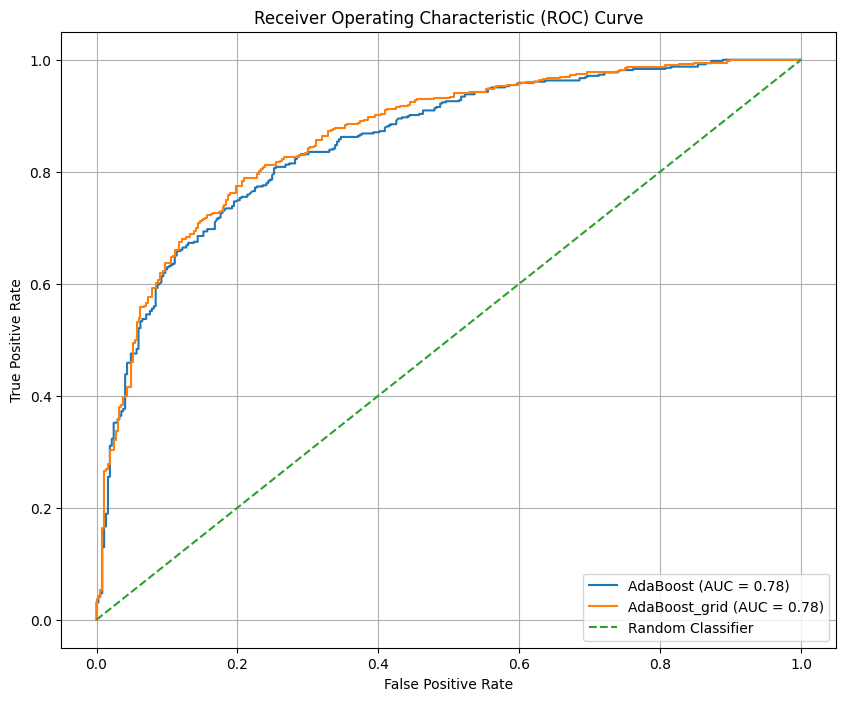

In [ ]:
plt.figure(figsize=(10, 8))


for name, model in models_ada_smote.items():
    # Fit the model
    model.fit(X_train1, Y_train1)


    # Predict probabilitiesx
    y_pred_proba = model.predict_proba(X_test1)[:, 1]


    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_test1, y_pred_proba)
    auc_score = roc_auc_score(Y_test1, y_pred_proba)


    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {accuracy:.2f})')


# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')


# Customize plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)


plt.show()


### **GBM**

In [ ]:
 from sklearn.ensemble import GradientBoostingClassifier
# Définir les valeurs possibles pour max_depth entre 5 et 29 (espacées)
param_grid = {
        'max_leaf_nodes': range(3, 8),
    'min_samples_leaf': range(5, 11),
    'max_depth': [5, 9, 13, 17, 29]


}


# Initialisation du modèle GradientBoostingClassifier
gbm = GradientBoostingClassifier()


# GridSearchCV avec GradientBoostingClassifier et le param_grid
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train1, Y_train1)


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
best_model = grid_search.best_estimator_


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
models_gbm2_smote = {
    'GBM': GradientBoostingClassifier(random_state=42),
    'GBM_grid': GradientBoostingClassifier(random_state=42,max_depth= 5, max_leaf_nodes= 7, min_samples_leaf= 7)}
# Train and evaluate each model
for name, model in models_gbm2_smote.items():
    print(f"\n{name}:")

    # Train the model
    model.fit(X_train1, Y_train1)

    # Make predictions
    y_pred = model.predict(X_test1)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test1, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(Y_test1, y_pred))


GBM:
Accuracy: 0.8667

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       369
           1       0.89      0.87      0.88       486

    accuracy                           0.87       855
   macro avg       0.86      0.87      0.86       855
weighted avg       0.87      0.87      0.87       855


GBM_grid:
Accuracy: 0.8795

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       369
           1       0.90      0.89      0.89       486

    accuracy                           0.88       855
   macro avg       0.88      0.88      0.88       855
weighted avg       0.88      0.88      0.88       855



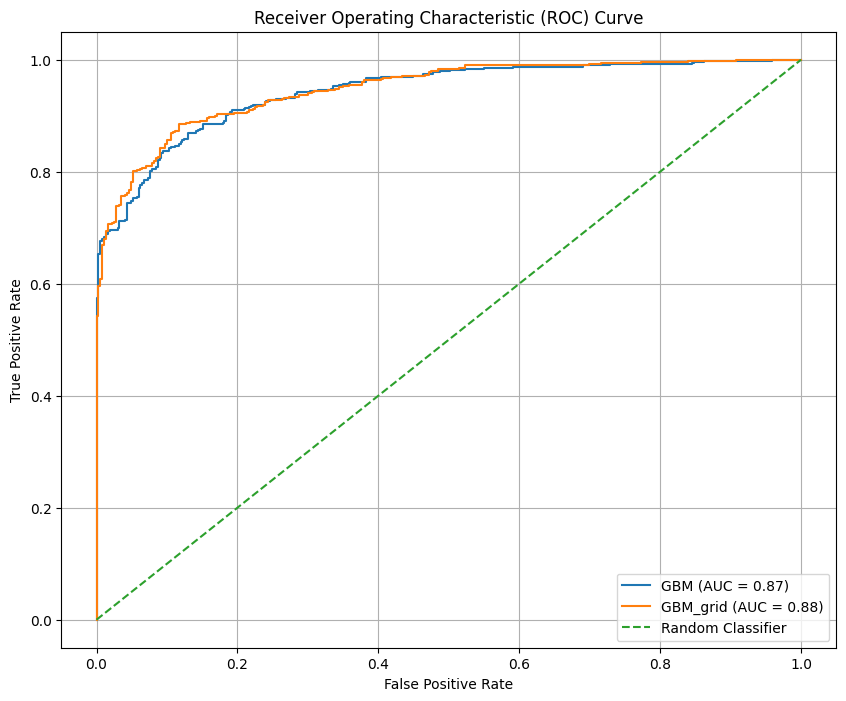

In [ ]:
plt.figure(figsize=(10, 8))


for name, model in models_gbm2_smote.items():
    # Fit the model
    model.fit(X_train1, Y_train1)
        # Make predictions
    y_pred = model.predict(X_test1)


    # Calculate accuracy
    accuracy = accuracy_score(Y_test1, y_pred)


    # Predict probabilitiesx
    y_pred_proba = model.predict_proba(X_test1)[:, 1]


    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_test1, y_pred_proba)
    auc_score = roc_auc_score(Y_test1, y_pred_proba)


    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {accuracy:.2f})')


# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')


# Customize plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)


plt.show()


### **XGboost**

In [ ]:
import xgboost as xgb
xgb = XGBClassifier()
param_grid = {
    'learning_rate' : np.linspace(0.01, 0.3, 1),
    'n_estimators': range(100,1001,100),
    'max_depth': [3, 5, 7]
}


grid_search = GridSearchCV(estimator=xgb,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)


grid_search.fit(X_train1, Y_train1)


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score", grid_search.best_score_)
best_model = grid_search.best_estimator_


In [ ]:
import xgboost as xgb
models_GBM_smoet = {
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'XGBoost_grid': xgb.XGBClassifier(random_state=42, learning_rate= 0.10666666666666666, max_depth =7, n_estimators= 700),
}
# Train and evaluate each model
for name, model in models_GBM_smoet.items():
    print(f"\n{name}:")


    # Train the model
    model.fit(X_train1, Y_train1)


    # Make predictions
    y_pred = model.predict(X_test1)


    # Calculate accuracy
    accuracy = accuracy_score(Y_test1, y_pred)
    print(f"Accuracy: {accuracy:.4f}")


    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(Y_test1, y_pred))


XGBoost:
Accuracy: 0.9357

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       369
           1       0.95      0.94      0.94       486

    accuracy                           0.94       855
   macro avg       0.93      0.93      0.93       855
weighted avg       0.94      0.94      0.94       855


XGBoost_grid:
Accuracy: 0.9345

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       369
           1       0.95      0.93      0.94       486

    accuracy                           0.93       855
   macro avg       0.93      0.93      0.93       855
weighted avg       0.93      0.93      0.93       855



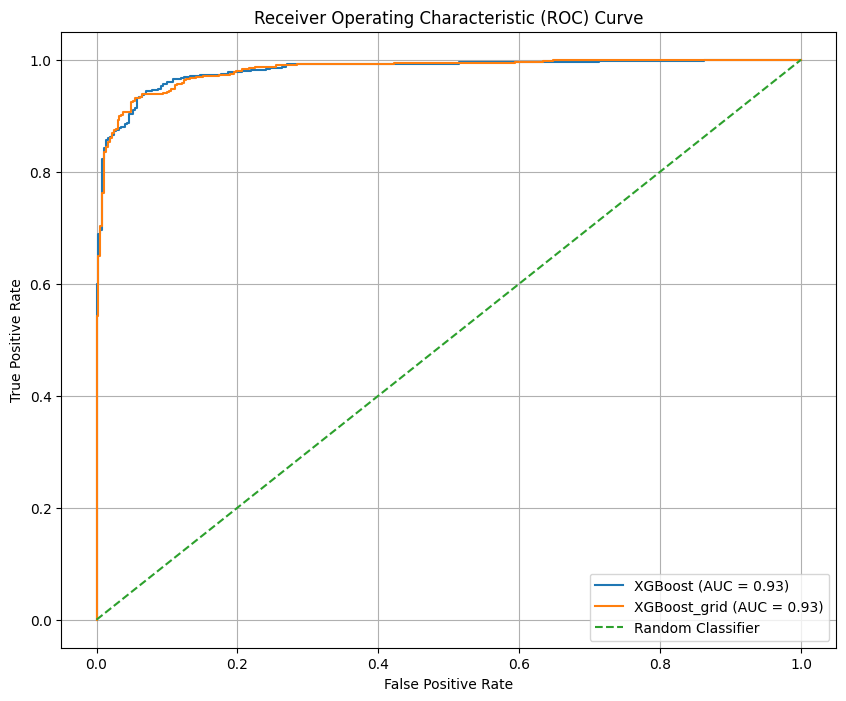

In [ ]:
plt.figure(figsize=(10, 8))


for name, model in models_GBM_smoet.items():
    # Fit the model
    model.fit(X_train1, Y_train1)


    # Predict probabilitiesx
    y_pred_proba = model.predict_proba(X_test1)[:, 1]


    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_test1, y_pred_proba)
    auc_score = roc_auc_score(Y_test1, y_pred_proba)


    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {accuracy:.2f})')


# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')


# Customize plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)


plt.show()


###**Decision tree**

In [ ]:
models_add_smote = {
    'Decision Tree': DecisionTreeClassifier(random_state=42)}
# Train and evaluate each model
for name, model in models_add_smote.items():
    print(f"\n{name}:")


    # Train the model
    model.fit(X_train1, Y_train1)


    # Make predictions
    y_pred = model.predict(X_test1)


    # Calculate accuracy
    accuracy = accuracy_score(Y_test1, y_pred)
    print(f"Accuracy: {accuracy:.4f}")


    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(Y_test1, y_pred))


Decision Tree:
Accuracy: 0.8550

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       369
           1       0.85      0.91      0.88       486

    accuracy                           0.85       855
   macro avg       0.86      0.85      0.85       855
weighted avg       0.86      0.85      0.85       855



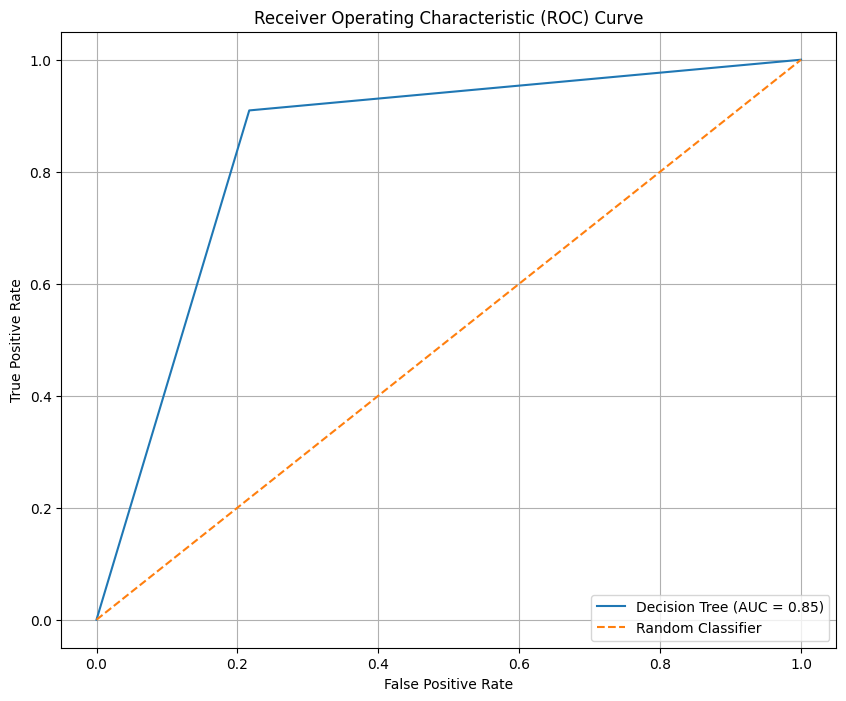

In [ ]:
plt.figure(figsize=(10, 8))

for name, model in models_add_smote.items():
    # Fit the model
    model.fit(X_train1, Y_train1)

    # Predict probabilitiesx
    y_pred_proba = model.predict_proba(X_test1)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_test1, y_pred_proba)
    auc_score = roc_auc_score(Y_test1, y_pred_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {accuracy:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')

# Customize plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

### **KNN**

In [ ]:
models_knn_smote = {
    'KNN': KNeighborsClassifier(),}
# Train and evaluate each model
for name, model in models_knn_smote.items():
    print(f"\n{name}:")


    # Train the model
    model.fit(X_train1, Y_train1)


    # Make predictions
    y_pred = model.predict(X_test1)


    # Calculate accuracy
    accuracy = accuracy_score(Y_test1, y_pred)
    print(f"Accuracy: {accuracy:.4f}")


    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(Y_test1, y_pred))


KNN:
Accuracy: 0.8257

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.65      0.76       369
           1       0.78      0.96      0.86       486

    accuracy                           0.83       855
   macro avg       0.85      0.80      0.81       855
weighted avg       0.84      0.83      0.82       855



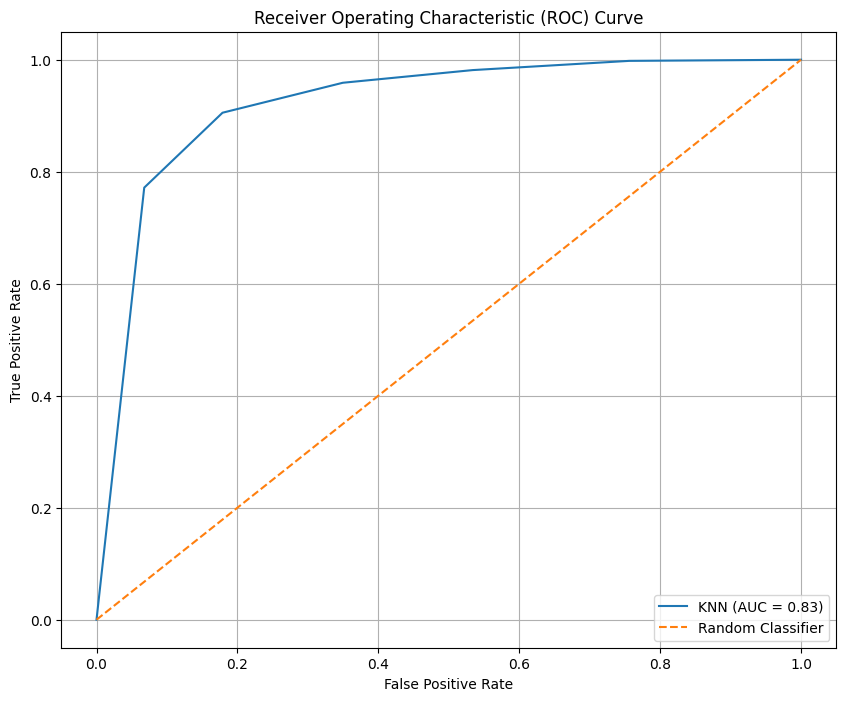

In [ ]:
plt.figure(figsize=(10, 8))


for name, model in models_knn_smote.items():
    # Fit the model
    model.fit(X_train1, Y_train1)

    # Make predictions
    y_pred = model.predict(X_test1)


    # Calculate accuracy
    accuracy = accuracy_score(Y_test1, y_pred)
    # Predict probabilitiesx
    y_pred_proba = model.predict_proba(X_test1)[:, 1]


    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_test1, y_pred_proba)
    auc_score = roc_auc_score(Y_test1, y_pred_proba)


    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {accuracy:.2f})')


# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')


# Customize plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)


plt.show()


# **V: Evaluation**

## **ROC/AUC without smote **

In [ ]:
models_final = {
    'KNN': KNeighborsClassifier(),
    'Random_grid': RandomForestClassifier(random_state=42, max_depth=13,n_estimators=16),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'Logistic_grid': LogisticRegression(random_state=42,C= 0.5455594781168515) ,
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'GBM_grid': GradientBoostingClassifier(random_state=42,max_depth= 9, max_leaf_nodes= 7, min_samples_leaf= 9),
    'AdaBoost_grid': AdaBoostClassifier(random_state=42, learning_rate=1.0,n_estimators=50)
}
# Train and evaluate each model
for name, model in models_final.items():
    print(f"\n{name}:")

    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(Y_test, y_pred))


KNN:
Accuracy: 0.8869

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       569
           1       0.74      0.31      0.44        94

    accuracy                           0.89       663
   macro avg       0.82      0.65      0.69       663
weighted avg       0.87      0.89      0.87       663


Random_grid:
Accuracy: 0.9306

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       569
           1       0.93      0.55      0.69        94

    accuracy                           0.93       663
   macro avg       0.93      0.77      0.83       663
weighted avg       0.93      0.93      0.92       663


XGBoost:
Accuracy: 0.9487

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       569
           1       0.94      0.68      0.79        94

    accuracy                 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8899

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       569
           1       0.71      0.38      0.50        94

    accuracy                           0.89       663
   macro avg       0.81      0.68      0.72       663
weighted avg       0.88      0.89      0.88       663



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


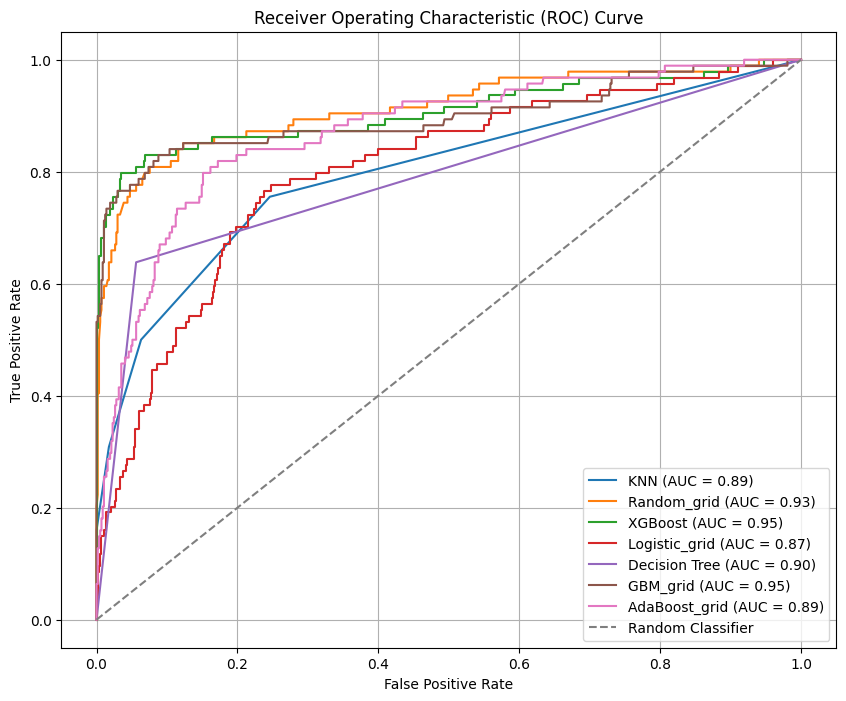

In [ ]:
plt.figure(figsize=(10, 8))

for name, model in models_final.items():
    # Fit the model
    model.fit(X_train, Y_train)
        # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)

    # Predict probabilitiesx
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
    auc_score = roc_auc_score(Y_test, y_pred_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {accuracy:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')

# Customize plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

## **ROC/AUC with smote **

In [ ]:
models_final_smote = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'GBM_grid': GradientBoostingClassifier(random_state=42,max_depth= 5, max_leaf_nodes= 7, min_samples_leaf= 7),
    'XGBoost_grid': xgb.XGBClassifier(random_state=42, learning_rate= 0.10666666666666666, max_depth =7, n_estimators= 700),
    'Random_grid': RandomForestClassifier(random_state=42),
    'Logistic_grid': LogisticRegression(random_state=42) ,
    'AdaBoost_grid': AdaBoostClassifier(random_state=42, learning_rate=0.34,n_estimators=490)
}
# Train and evaluate each model
for name, model in models_final_smote.items():
    print(f"\n{name}:")


    # Train the model
    model.fit(X_train1, Y_train1)


    # Make predictions
    y_pred = model.predict(X_test1)


    # Calculate accuracy
    accuracy = accuracy_score(Y_test1, y_pred)
    print(f"Accuracy: {accuracy:.4f}")


    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(Y_test1, y_pred))


KNN:
Accuracy: 0.8257

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.65      0.76       369
           1       0.78      0.96      0.86       486

    accuracy                           0.83       855
   macro avg       0.85      0.80      0.81       855
weighted avg       0.84      0.83      0.82       855


Decision Tree:
Accuracy: 0.8550

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       369
           1       0.85      0.91      0.88       486

    accuracy                           0.85       855
   macro avg       0.86      0.85      0.85       855
weighted avg       0.86      0.85      0.85       855


GBM_grid:
Accuracy: 0.8795

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       369
           1       0.90      0.89      0.89       486

    accuracy              

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.7778

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       369
           1       0.79      0.84      0.81       486

    accuracy                           0.78       855
   macro avg       0.78      0.77      0.77       855
weighted avg       0.78      0.78      0.78       855



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


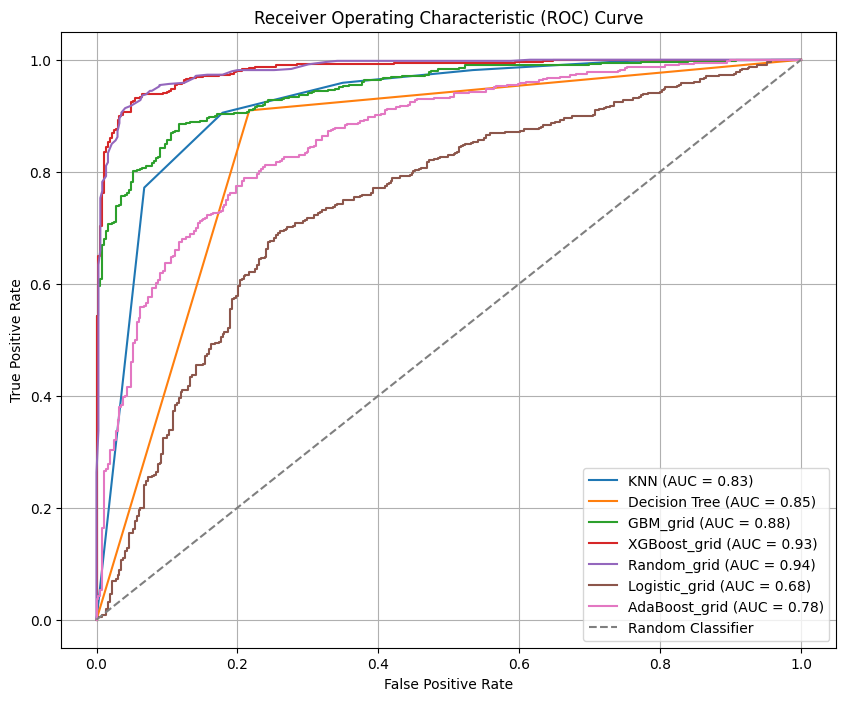

In [ ]:
plt.figure(figsize=(10, 8))


for name, model in models_final_smote.items():
    # Fit the model
    model.fit(X_train1, Y_train1)
        # Make predictions
    y_pred = model.predict(X_test1)


    # Calculate accuracy
    accuracy = accuracy_score(Y_test1, y_pred)


    # Predict probabilitiesx
    y_pred_proba = model.predict_proba(X_test1)[:, 1]


    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(Y_test1, y_pred_proba)
    auc_score = roc_auc_score(Y_test1, y_pred_proba)


    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {accuracy:.2f})')


# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')


# Customize plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)


plt.show()


After analyzing the ROC curves for all models with and without SMOTE, we can conclude that the best model for predicting churn is XGBoost. Its performance stands out, demonstrating the highest ability to distinguish between churn and non-churn cases compared to the other models.
the ROC curves for both  with and without SMOTE: indicates that oversampling with SMOTE may have introduced noise, slightly reducing the overall performance of the models.

# **VI: Deployment**

In [ ]:
import pandas as pd

# Supposons que votre DataFrame s'appelle `data`
# Filtrer les individus où Churn == 1
churned_individuals = data[data['Churn'] == 1]

# Sélectionner un individu aléatoire
random_individual = churned_individuals.sample(n=1, random_state=42)  # Vous pouvez modifier `random_state` ou le retirer pour des résultats différents à chaque exécution

# Afficher l'individu sélectionné
print(random_individual)


      State  Account length  International plan  Number vmail messages  \
2836     45              68                   1                      0   

      Total day charge  Total eve charge  Total night charge  \
2836             25.25             18.65                8.93   

      Total intl charge  Customer service calls  Churn  Day minutes per call  \
2836               3.92                       1      1              1.178571   

      Eve minutes per call  Night minutes per call  Intl minutes per call  
2836                1.7552                1.640496               2.071429  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib  # For saving models
from xgboost import XGBClassifier


# Assuming combined_data is your full dataset
X1 = data[[
    'State','Account length', 'International plan', 'Number vmail messages',
    'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge',
    'Customer service calls', 'Day minutes per call',
    'Eve minutes per call', 'Night minutes per call', 'Intl minutes per call'
]]
Y1 = data["Churn"]

# Split data
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Initialize and train Gradient Boosting model
model = XGBClassifier()
model.fit(X_train2, Y_train2)

# Save the trained model
joblib.dump(model, 'XGB_model.pkl')

['XGB_model.pkl']

In [ ]:
import numpy as np
import pandas as pd
import joblib

# Load the model
loaded_model = joblib.load('XGB_model.pkl')

# Input data for prediction
input_data = (45,68,1,0,25.25,18.65,8.93,3.92,1
              ,1.78571,1.7552,1.60496,2.071429)

# Convert the input data to a DataFrame with feature names
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Create a DataFrame with appropriate feature names
features = [
    'State','Account length', 'International plan', 'Number vmail messages',
    'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge',
    'Customer service calls', 'Day minutes per call',
    'Eve minutes per call', 'Night minutes per call', 'Intl minutes per call'
]
input_data_df = pd.DataFrame(input_data_reshaped, columns=features)

# Make the prediction
prediction = loaded_model.predict(input_data_df)
print(prediction)

# Output based on prediction
if prediction[0] == 0:
  print('Le client est fidèle (non churn)')
else:
  print('Le client est susceptible de se désabonner (churn)')

[1]
Le client est susceptible de se désabonner (churn)
